In [1]:
# Define seasonal multipliers per category
seasonality_factors = {
    "WINE":   {1: 0.9, 2: 0.8, 3: 0.9, 4: 1.1, 5: 1.0, 6: 1.0, 7: 1.2, 8: 1.1, 9: 1.0, 10: 1.2, 11: 1.5, 12: 2.0},  # Peaks in Dec
    "BEER":   {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.1, 5: 1.3, 6: 1.5, 7: 1.7, 8: 1.4, 9: 1.2, 10: 1.0, 11: 0.9, 12: 0.8},  # Peaks in Summer
    "LIQUOR": {1: 1.0, 2: 1.0, 3: 1.1, 4: 1.1, 5: 1.0, 6: 1.0, 7: 1.2, 8: 1.2, 9: 1.1, 10: 1.3, 11: 1.4, 12: 1.8},  # Steady + Dec peak
    "NON-ALCOHOL": {m: 1.0 for m in range(1, 13)}  # No strong seasonality
}


In [2]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df_2024= pd.read_csv('main.csv')

df_2024

,Month,SKU,Description,Category,Supplier,Sales
0,1,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,80.0
1,1,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,1000.0
2,1,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,1000.0
3,1,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,2000.0
4,1,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,1000.0
...,...,...,...,...,...,...
150449,12,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.0
150450,12,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.0
150451,12,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.0
150452,12,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.0


In [6]:
df_2024


,Month,SKU,Description,Category,Supplier,Sales
0,2024-01-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,80.0
1,2024-01-01,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,1000.0
2,2024-01-01,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,1000.0
3,2024-01-01,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,2000.0
4,2024-01-01,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,1000.0
...,...,...,...,...,...,...
150449,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.0
150450,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.0
150451,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.0
150452,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.0


In [9]:


# Ensure df_2024 is properly loaded
df_2024["Month"] = df_2024["Month"].astype(str)  # Convert Month column to string

# Define seasonality multipliers per category & month
seasonality_factors = {
    "WINE": {1: 0.9, 2: 0.95, 3: 1.0, 4: 1.1, 5: 1.2, 6: 1.3, 7: 1.4, 8: 1.3, 9: 1.2, 10: 1.15, 11: 1.4, 12: 1.5},
    "BEER": {1: 0.8, 2: 0.85, 3: 0.9, 4: 1.1, 5: 1.25, 6: 1.35, 7: 1.5, 8: 1.45, 9: 1.3, 10: 1.2, 11: 1.4, 12: 1.6},
    "LIQUOR": {1: 1.0, 2: 1.05, 3: 1.1, 4: 1.15, 5: 1.2, 6: 1.25, 7: 1.3, 8: 1.3, 9: 1.25, 10: 1.2, 11: 1.3, 12: 1.4},
    "KEGS": {1: 0.85, 2: 0.9, 3: 0.95, 4: 1.05, 5: 1.15, 6: 1.25, 7: 1.3, 8: 1.3, 9: 1.2, 10: 1.1, 11: 1.2, 12: 1.3},
    "STR_SUPPLIES": {1: 0.8, 2: 0.85, 3: 0.9, 4: 1.0, 5: 1.1, 6: 1.2, 7: 1.3, 8: 1.2, 9: 1.1, 10: 1.0, 11: 1.1, 12: 1.2},
    "REF": {1: 0.85, 2: 0.9, 3: 0.95, 4: 1.05, 5: 1.15, 6: 1.2, 7: 1.3, 8: 1.2, 9: 1.15, 10: 1.1, 11: 1.2, 12: 1.3},
    "NON-ALCOHOL": {1: 0.9, 2: 0.95, 3: 1.0, 4: 1.1, 5: 1.2, 6: 1.3, 7: 1.35, 8: 1.3, 9: 1.2, 10: 1.15, 11: 1.3, 12: 1.4},
    "DUNNAGE": {1: 0.85, 2: 0.9, 3: 0.95, 4: 1.0, 5: 1.1, 6: 1.2, 7: 1.25, 8: 1.2, 9: 1.1, 10: 1.05, 11: 1.15, 12: 1.2},
}

# Function to generate historical sales with seasonality
def generate_seasonal_sales(df, year):
    new_rows = []
    
    for _, row in df.iterrows():
        category = row["Category"]
        base_sales = row["Sales"]

        for month in range(1, 13):
            # Apply seasonality multiplier (default to 1.0 if missing)
            seasonal_multiplier = seasonality_factors.get(category, {}).get(month, 1.0)
            
            # Introduce randomness (avoid perfect scaling)
            random_factor = np.random.uniform(0.85, 1.15)

            # Compute new sales with seasonality and randomness
            new_sales = base_sales * seasonal_multiplier * random_factor
            
            new_rows.append({
                "Month": f"01/{month}/{year}",
                "SKU": row["SKU"],
                "Description": row["Description"],
                "Category": row["Category"],
                "Supplier": row["Supplier"],
                "Sales": round(new_sales, 2)
            })
    
    return new_rows

# Generate data for 2022 & 2023
historical_data = []
for year in [2022, 2023]:
    historical_data.extend(generate_seasonal_sales(df_2024[df_2024["Month"].astype(str).str.contains("2024")], year))

# Convert to DataFrame
df_historical = pd.DataFrame(historical_data)

# Combine with 2024 data
df_final = pd.concat([df_historical, df_2024], ignore_index=True)

# Verify changes
print(df_final.sample(10))
print(df_final["Month"].unique())  # Should now contain 2022, 2023, and 2024


              Month     SKU                                       Description  \
3314117   01/6/2023  238842                               ARCAIA CHARD - 1.5L   
1758193   01/2/2022   50512                       CAFFE LOLITA COFFEE - 750ML   
1522553   01/6/2022   30791                     FLYING DOG BLOODLINE 2/12 CAN   
1718422  01/11/2022  342122  AVION 375ML TASTING FLIGHT SILVER REPOSADO ANEJO   
3070848   01/1/2023   40282            MICHELE CHIARLO NIVOLE MOSCATO - 375ML   
3196928   01/9/2023  336494                        BADEL BOGDANUSA WH - 750ML   
1969483   01/8/2023  233894                   GLORIA FERRER BRUT ROSE - 750ML   
556194    01/7/2022   63541                PENFOLDS KOONUNGA HILL SHZ - 750ML   
3175249   01/2/2023   30870                  FLYING DOG BLOODLINE NITRO 1/2KG   
1466900   01/9/2022   80132                                    LOFT MERLOT 3L   

        Category                                Supplier     Sales  
3314117     WINE               MONSIEUR

In [10]:
df_final

,Month,SKU,Description,Category,Supplier,Sales
0,01/1/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,82.40
1,01/2/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,65.34
2,01/3/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,86.87
3,01/4/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,90.64
4,01/5/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,106.46
...,...,...,...,...,...,...
3761345,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,4500.00
3761346,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,2000.00
3761347,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,5500.00
3761348,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,92500.00


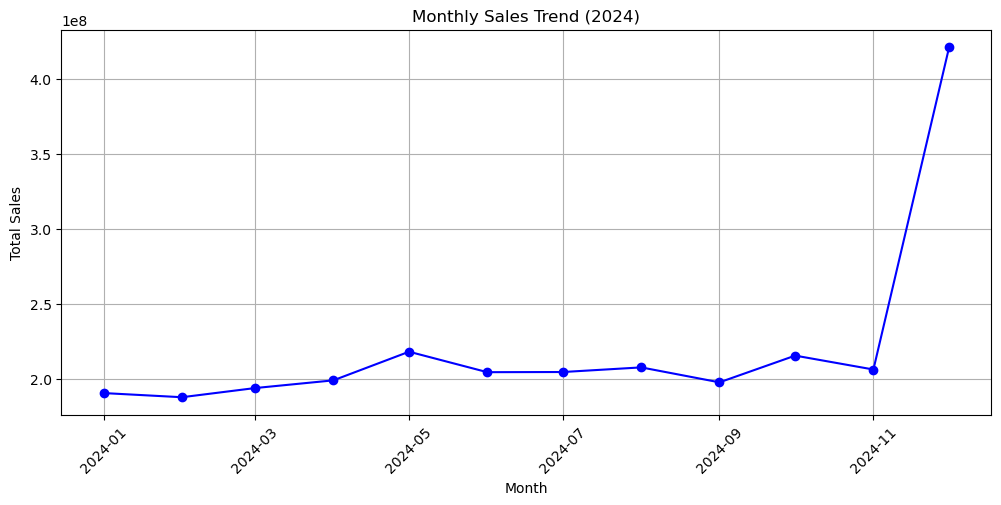

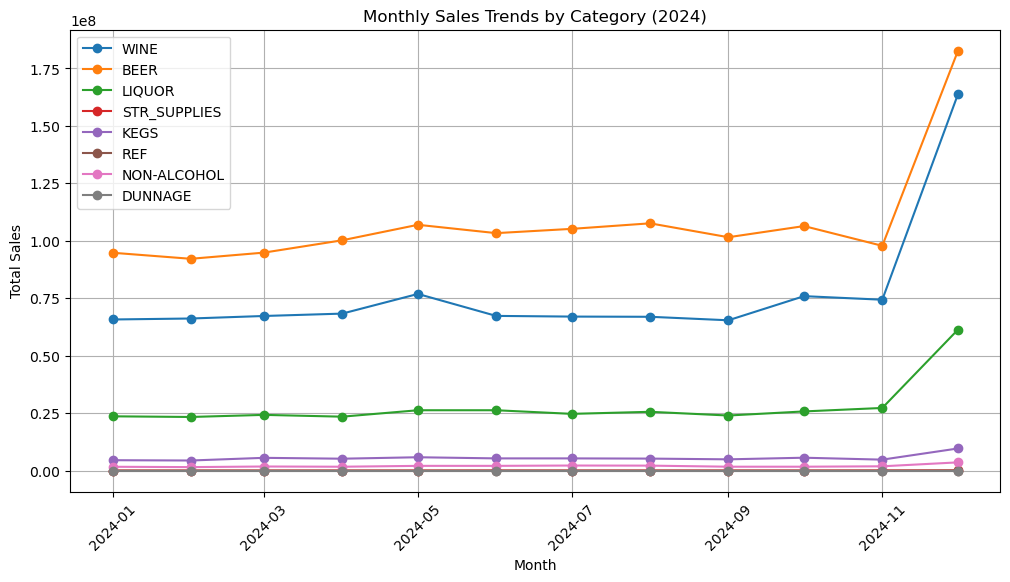

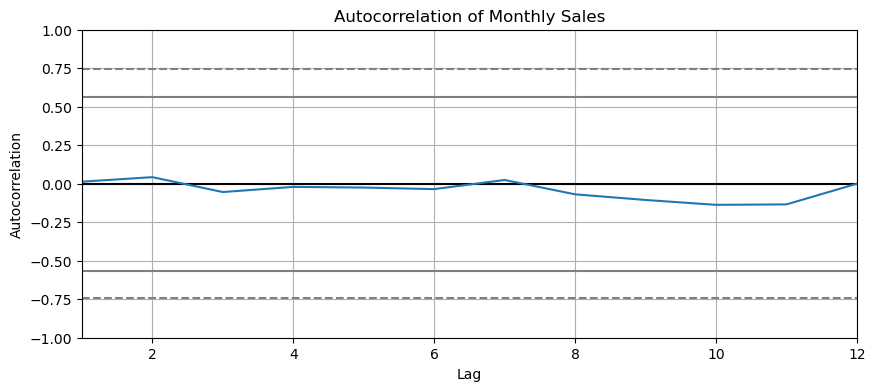

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# Ensure Month is in datetime format
df_2024["Month"] = pd.to_datetime(df_2024["Month"], format="%Y-%m-%d")

# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_2024["Category"].unique():
    category_sales = df_2024[df_2024["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Autocorrelation Analysis to Detect Seasonality
plt.figure(figsize=(10,4))
autocorrelation_plot(monthly_sales)
plt.title("Autocorrelation of Monthly Sales")
plt.show()


In [13]:
# Define seasonality adjustments for stronger effect
seasonality_factors = {
    1: 0.85,  2: 0.90,  3: 0.95,  4: 1.00,  5: 1.15,  6: 1.00, 
    7: 1.10,  8: 1.10,  9: 1.00, 10: 1.05, 11: 1.15, 12: 1.60
}

# Apply seasonality adjustments to 2024 sales
df_2024["Sales"] = df_2024.apply(lambda row: 
    round(row["Sales"] * seasonality_factors.get(row["Month"].month, 1.0) * np.random.uniform(0.9, 1.1), 2), axis=1)



In [14]:
df_2024

,Month,SKU,Description,Category,Supplier,Sales
0,2024-01-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,71.18
1,2024-01-01,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,926.53
2,2024-01-01,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,845.19
3,2024-01-01,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,1531.16
4,2024-01-01,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,929.07
...,...,...,...,...,...,...
150449,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,7197.33
150450,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,3443.55
150451,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,8792.36
150452,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,137237.32


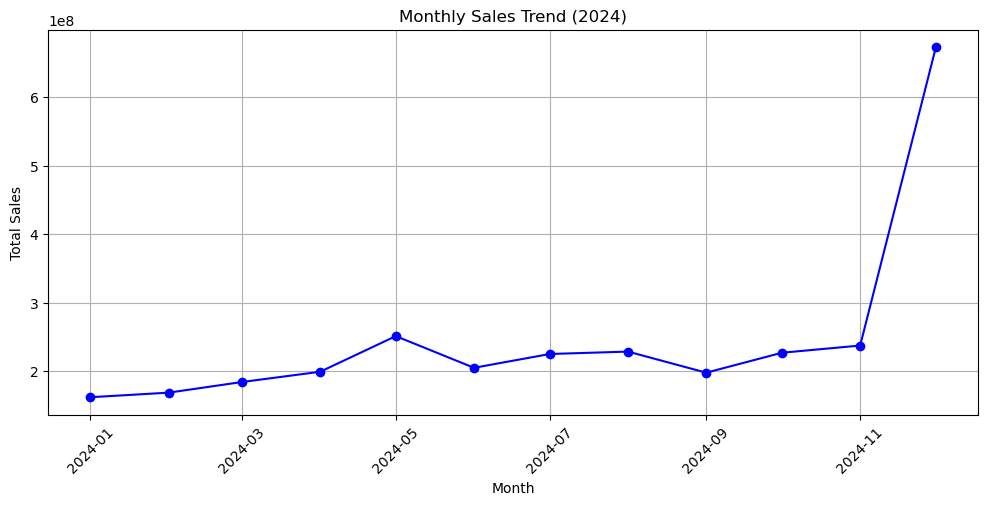

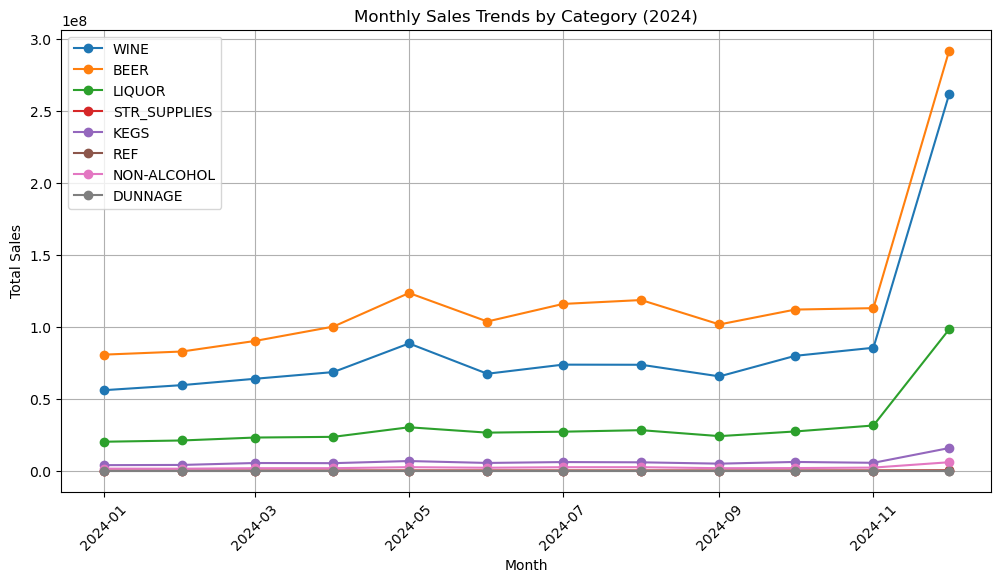

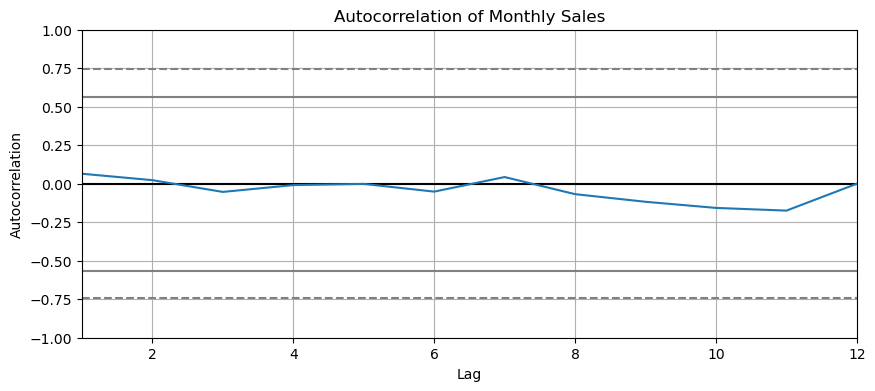

In [15]:

# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_2024["Category"].unique():
    category_sales = df_2024[df_2024["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Autocorrelation Analysis to Detect Seasonality
plt.figure(figsize=(10,4))
autocorrelation_plot(monthly_sales)
plt.title("Autocorrelation of Monthly Sales")
plt.show()


In [16]:
seasonality_factors = {
    "WINE": {1: 0.7, 2: 0.75, 3: 0.9, 4: 1.1, 5: 1.3, 6: 1.25, 7: 1.2, 8: 1.15, 9: 1.0, 10: 1.05, 11: 1.2, 12: 1.8},
    "LIQUOR": {1: 0.7, 2: 0.75, 3: 0.9, 4: 1.1, 5: 1.3, 6: 1.25, 7: 1.2, 8: 1.15, 9: 1.0, 10: 1.05, 11: 1.2, 12: 1.8},
    "BEER": {1: 0.8, 2: 0.85, 3: 0.95, 4: 1.0, 5: 1.05, 6: 1.15, 7: 1.3, 8: 1.25, 9: 1.0, 10: 1.1, 11: 1.15, 12: 1.5},
    "KEGS": {1: 0.85, 2: 0.9, 3: 0.95, 4: 1.2, 5: 1.25, 6: 1.3, 7: 1.2, 8: 1.1, 9: 1.0, 10: 1.1, 11: 1.05, 12: 1.2},
    "STR_SUPPLIES": {1: 0.85, 2: 0.9, 3: 0.95, 4: 1.2, 5: 1.25, 6: 1.3, 7: 1.2, 8: 1.1, 9: 1.0, 10: 1.1, 11: 1.05, 12: 1.2},
    "NON-ALCOHOL": {1: 0.95, 2: 0.98, 3: 1.00, 4: 1.02, 5: 1.03, 6: 1.05, 7: 1.06, 8: 1.07, 9: 1.0, 10: 1.1, 11: 1.15, 12: 1.2},
}

# Apply seasonality adjustment
df_2024["Sales"] = df_2024.apply(lambda row: 
    round(row["Sales"] * seasonality_factors.get(row["Category"], {}).get(row["Month"].month, 1.0) * np.random.uniform(0.9, 1.1), 2), axis=1)

In [17]:
df_2024

,Month,SKU,Description,Category,Supplier,Sales
0,2024-01-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,47.18
1,2024-01-01,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,640.36
2,2024-01-01,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,649.64
3,2024-01-01,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,1038.51
4,2024-01-01,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,611.07
...,...,...,...,...,...,...
150449,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11509.19
150450,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4217.99
150451,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11965.31
150452,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,189860.23


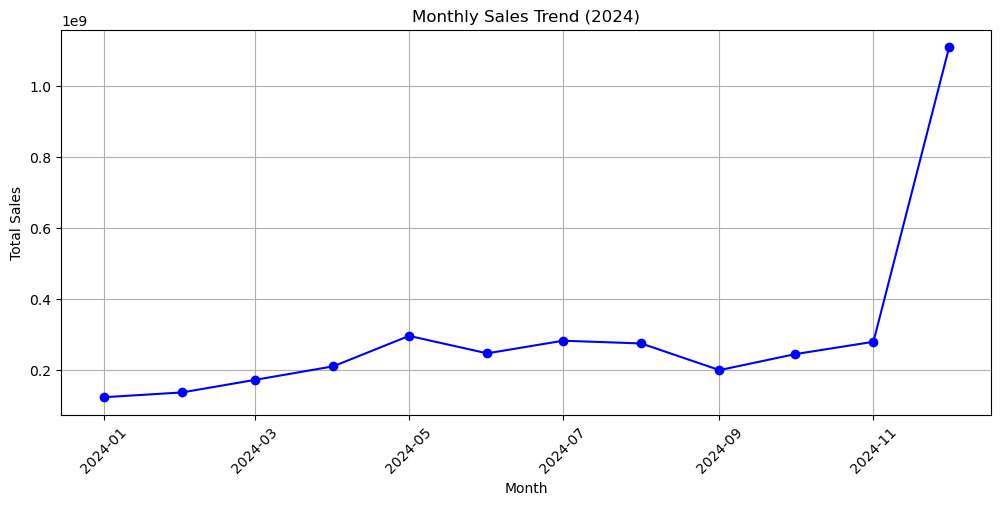

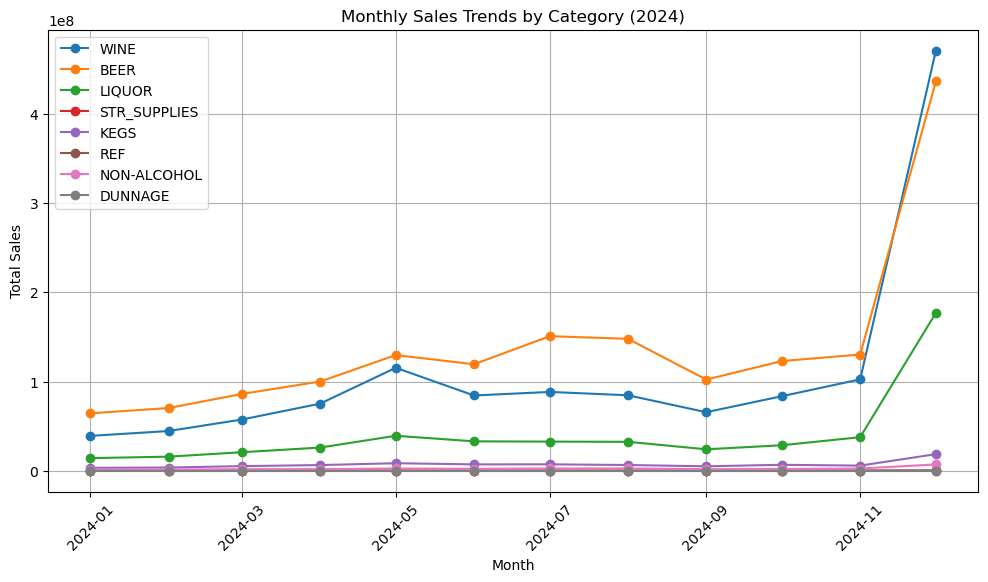

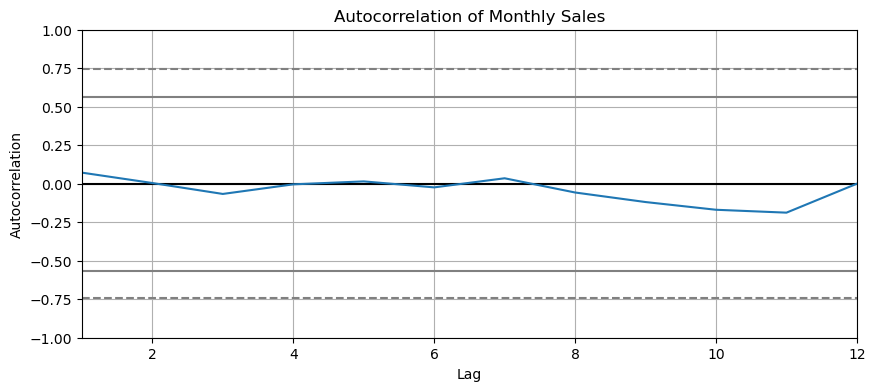

In [18]:

# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_2024["Category"].unique():
    category_sales = df_2024[df_2024["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Autocorrelation Analysis to Detect Seasonality
plt.figure(figsize=(10,4))
autocorrelation_plot(monthly_sales)
plt.title("Autocorrelation of Monthly Sales")
plt.show()


In [23]:
# Define seasonality multipliers by category
seasonality_factors = {
    "WINE": {1: 0.7, 2: 0.8, 3: 1.0, 4: 1.0, 5: 1.2, 6: 1.0, 7: 1.3, 8: 1.3, 9: 0.9, 10: 0.9, 11: 1.0, 12: 0.9},
    "BEER": {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.0, 5: 1.1, 6: 1.0, 7: 1.2, 8: 1.2, 9: 1.0, 10: 1.0, 11: 1.0, 12: 0.9},
    "LIQUOR": {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.0, 5: 1.2, 6: 1.0, 7: 1.3, 8: 1.3, 9: 0.9, 10: 0.9, 11: 1.0, 12: 0.9},
    "KEGS": {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.0, 5: 1.2, 6: 1.0, 7: 1.3, 8: 1.3, 9: 0.9, 10: 0.9, 11: 1.0, 12: 0.9},
    "NON-ALCOHOL": {1: 0.9, 2: 0.9, 3: 1.0, 4: 1.0, 5: 1.1, 6: 1.0, 7: 1.1, 8: 1.1, 9: 1.0, 10: 1.0, 11: 1.0, 12: 0.9},
}

# Apply seasonality adjustment to 2024 data
df_2024["Sales_Adjusted"] = df_2024.apply(
    lambda row: row["Sales"] * seasonality_factors.get(row["Category"], {}).get(row["Month"].month, 1.0),
    axis=1
)

# Replace original sales with adjusted values
df_2024["Sales"] = df_2024["Sales_Adjusted"]
df_2024.drop(columns=["Sales_Adjusted"], inplace=True)


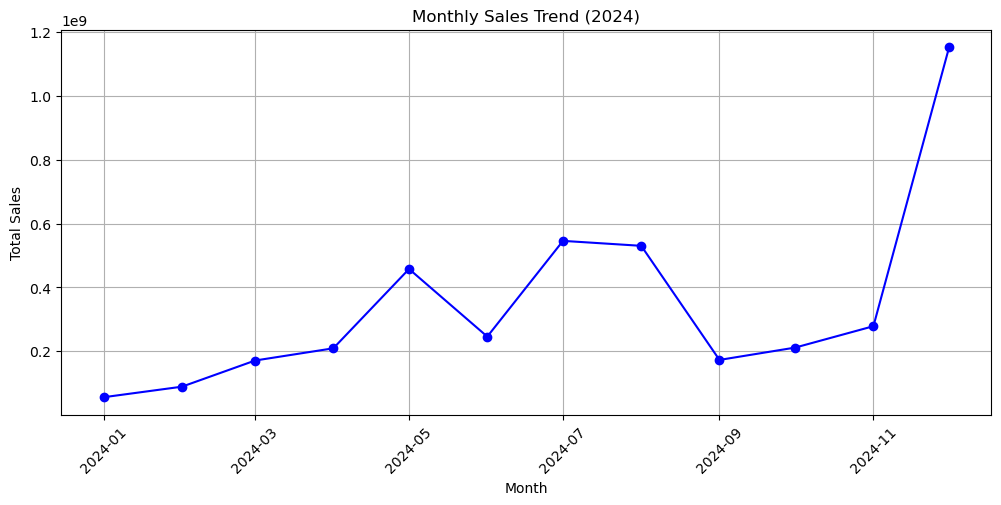

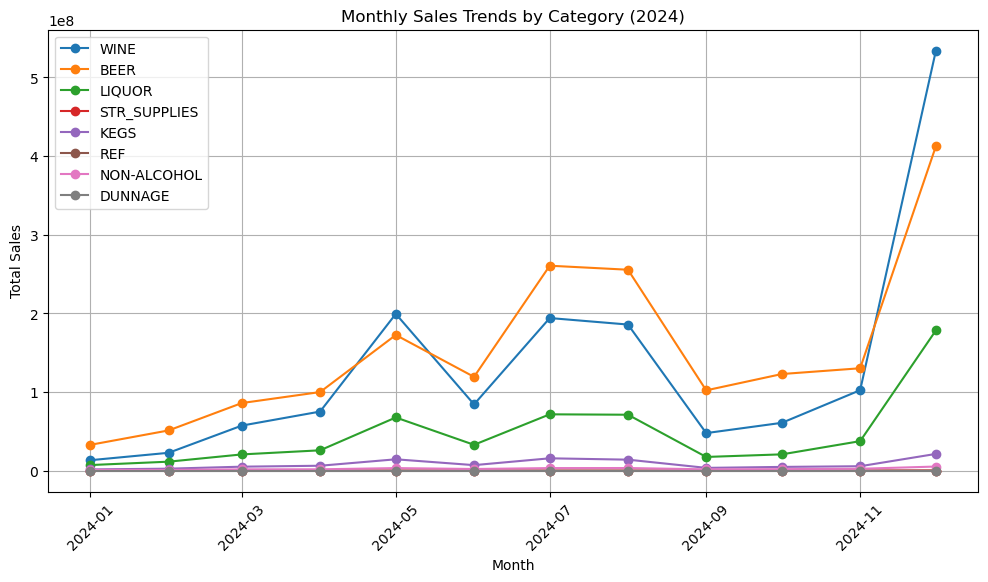

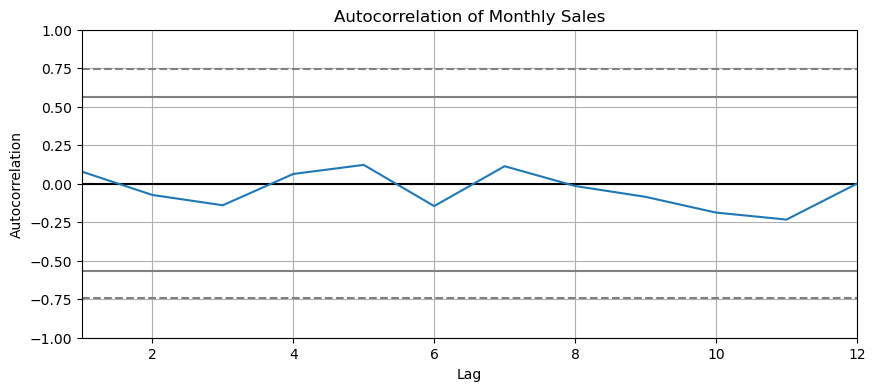

In [24]:

# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_2024["Category"].unique():
    category_sales = df_2024[df_2024["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Autocorrelation Analysis to Detect Seasonality
plt.figure(figsize=(10,4))
autocorrelation_plot(monthly_sales)
plt.title("Autocorrelation of Monthly Sales")
plt.show()


In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf



<Figure size 1000x500 with 0 Axes>

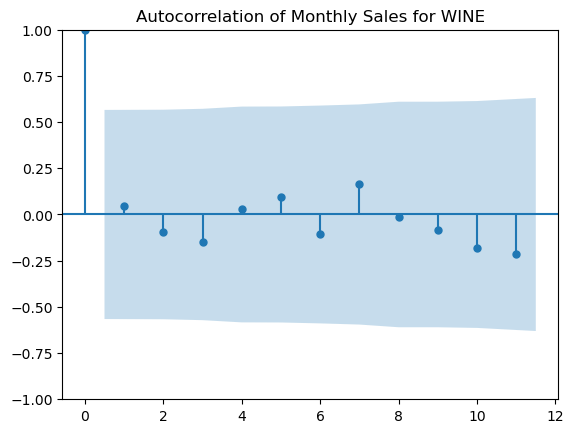

In [30]:
# Ensure Month is datetime format
df_2024["Month"] = pd.to_datetime(df_2024["Month"], format="%d/%m/%Y")

# Select a single category (e.g., WINE) and aggregate monthly sales
wine_sales = df_2024[df_2024["Category"] == "WINE"].groupby(df_2024["Month"])["Sales"].sum()

# Reduce lags to avoid shape mismatch error
plt.figure(figsize=(10,5))
plot_acf(wine_sales, lags=min(11, len(wine_sales)-1))
plt.title("Autocorrelation of Monthly Sales for WINE")
plt.show()



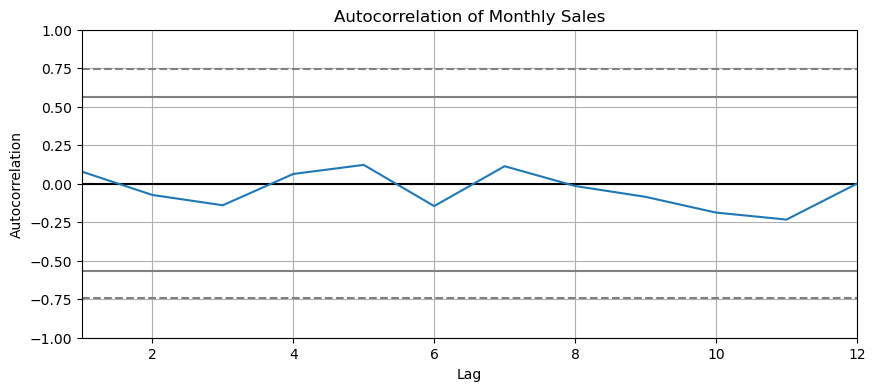

In [31]:
# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# 3️⃣ Autocorrelation Analysis to Detect Seasonality
plt.figure(figsize=(10,4))
autocorrelation_plot(monthly_sales)
plt.title("Autocorrelation of Monthly Sales")
plt.show()

In [34]:
seasonality_factors = {
    1: 0.85,  # January - Post-Holiday Dip
    2: 0.80,  # February - Lowest Demand
    3: 0.95,  # March - Slight Recovery
    4: 1.00,  # April - Average Sales
    5: 1.10,  # May - Small Peak
    6: 1.05,  # June - Summer Demand Rises
    7: 1.15,  # July - Peak Consumption
    8: 1.20,  # August - Summer Demand Continues
    9: 1.00,  # September - Normal
    10: 1.05, # October - Pre-Holiday Stocking
    11: 1.10, # November - Start of Holiday Spike
    12: 1.40  # December - Holiday & New Year Peak
}


# Apply seasonality to df_2024
df_2024["Sales_Adjusted"] = df_2024.apply(
    lambda row: row["Sales"] * seasonality_factors[row["Month"].month] * np.random.uniform(0.85, 1.15), axis=1
)

<Figure size 1000x500 with 0 Axes>

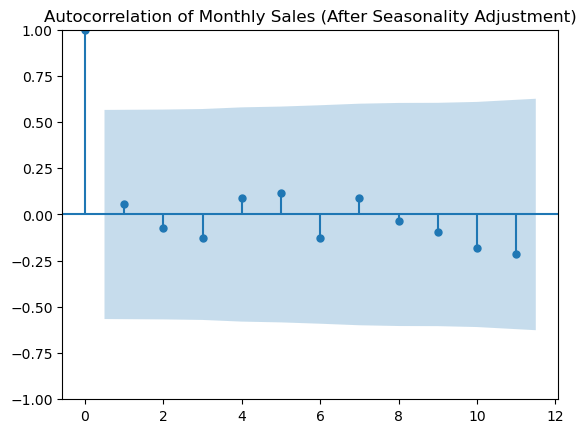

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Group by month & sum sales for visualization
monthly_sales_2024 = df_2024.groupby(df_2024["Month"].dt.to_period("M"))["Sales_Adjusted"].sum()

# Ensure lags are set correctly based on available data
num_lags = min(12, len(monthly_sales_2024) - 1)

# Re-attempt plotting with corrected lags
plt.figure(figsize=(10,5))
plot_acf(monthly_sales_2024, lags=num_lags)
plt.title("Autocorrelation of Monthly Sales (After Seasonality Adjustment)")
plt.show()


In [39]:
df_2024

,Month,SKU,Description,Category,Supplier,Sales,Sales_Adjusted
0,2024-01-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,16.18274,12.638078
1,2024-01-01,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,219.64348,203.048683
2,2024-01-01,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,222.82652,209.196851
3,2024-01-01,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,356.20893,309.335547
4,2024-01-01,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,209.59701,173.351844
...,...,...,...,...,...,...,...
150449,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10876.18455,15475.003974
150450,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4859.12448,6744.878679
150451,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11307.21795,14353.390001
150452,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,179417.91735,284858.068083


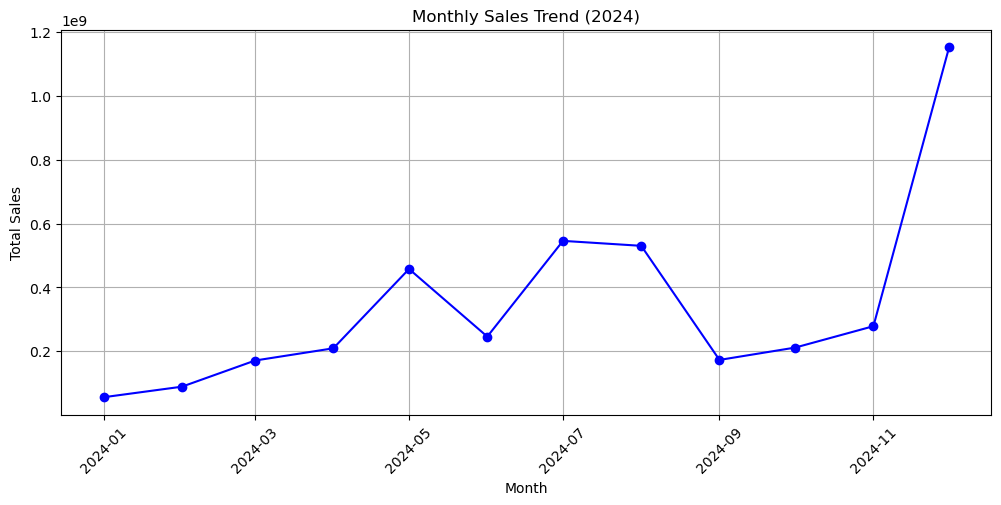

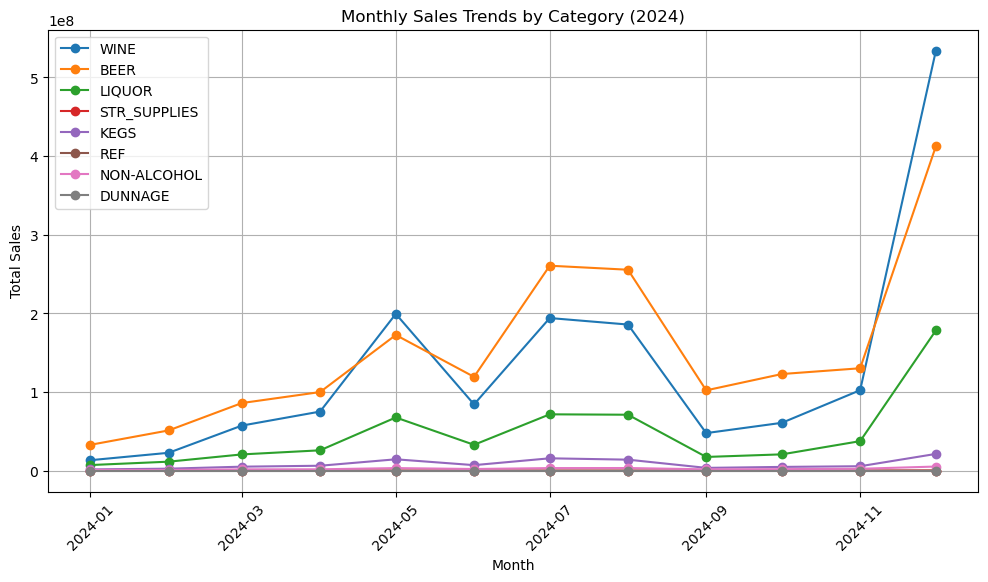

In [40]:
# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_2024["Category"].unique():
    category_sales = df_2024[df_2024["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [41]:
seasonality_factors = {
    "2024": {1: 0.9, 2: 0.85, 3: 0.95, 4: 1.1, 5: 1.2, 6: 1.15, 
             7: 1.1, 8: 1.05, 9: 1.0, 10: 0.95, 11: 0.9, 12: 1.3},
    "2023": {1: 0.92, 2: 0.88, 3: 0.98, 4: 1.05, 5: 1.15, 6: 1.1, 
             7: 1.08, 8: 1.03, 9: 0.98, 10: 0.93, 11: 0.88, 12: 1.25},
    "2022": {1: 0.88, 2: 0.83, 3: 0.9, 4: 1.07, 5: 1.12, 6: 1.1, 
             7: 1.05, 8: 1.02, 9: 0.96, 10: 0.9, 11: 0.85, 12: 1.2}
}

In [43]:
# Function to generate historical sales data
def generate_historical_sales(df, year):
    new_rows = []
    
    for _, row in df.iterrows():
        category = row["Category"]
        base_sales = row["Sales"]

        # Determine number of sales events (rows) for this SKU in this year
        num_sales_events = int(np.random.uniform(0.85, 1.15) * base_sales / 1000)  # Scale to avoid too many rows
        num_sales_events = max(1, num_sales_events)  # Ensure at least 1 sale

        for _ in range(num_sales_events):  # Generate multiple sales events per SKU
            month = np.random.choice(range(1, 13), p=np.array(list(seasonality_factors[str(year)].values())) / sum(seasonality_factors[str(year)].values()))
            
            # Apply seasonality multiplier + small random variation
            seasonal_multiplier = seasonality_factors[str(year)][month]
            random_factor = np.random.uniform(0.9, 1.1)  # Small randomness
            
            new_sales = base_sales * seasonal_multiplier * random_factor / num_sales_events  # Scale by events
            
            new_rows.append({
                "Month": f"01/{month}/{year}",
                "SKU": row["SKU"],
                "Description": row["Description"],
                "Category": row["Category"],
                "Supplier": row["Supplier"],
                "Sales": round(new_sales, 2)
            })
    
    return new_rows

# Generate sales data for 2022 & 2023
historical_data = []
for year in [2022, 2023]:
    historical_data.extend(generate_historical_sales(df_2024, year))

# Convert to DataFrame
df_historical = pd.DataFrame(historical_data)


In [44]:
df_historical

,Month,SKU,Description,Category,Supplier,Sales
0,01/1/2022,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,13.48
1,01/11/2022,100012,PAPI P/GRIG - 750ML,WINE,INTERBALT PRODUCTS CORP,173.03
2,01/10/2022,100023,CH PARADIS-TERRE DES ANGES ROSE,WINE,PWSWN INC,217.70
3,01/4/2022,100024,MOMENT DE PLAISIR - 750ML,WINE,PWSWN INC,358.43
4,01/11/2022,100080,KEDEM CREAM RED CONCORD - 750ML,WINE,ROYAL WINE CORP,193.99
...,...,...,...,...,...,...
8167065,01/11/2023,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,819.06
8167066,01/9/2023,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,931.08
8167067,01/12/2023,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,1312.06
8167068,01/4/2023,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,1006.50


In [45]:
# Count the number of rows where Sales = 0
zero_sales_count = df_historical[df_historical["Sales"] + 0].shape[0]

# Display the count
print(f"Number of rows with Sales = 0: {zero_sales_count}")


Number of rows with Sales = 0: 3070


In [46]:
# Count the number of rows where Sales = 0
zero_sales_count = df_2024[df_2024["Sales"] == 0].shape[0]

# Display the count
print(f"Number of rows with Sales = 0: {zero_sales_count}")


Number of rows with Sales = 0: 1535


In [47]:
# Remove rows where Sales is 0
df_historical = df_historical[df_historical["Sales"] > 0]

# Verify deletion
print(f"New row count after removing zero-sales rows: {df_historical.shape[0]}")


New row count after removing zero-sales rows: 8164000


In [52]:
def generate_historical_sales(df, year):
    new_rows = []
    
    for _, row in df.iterrows():
        category = row["Category"]
        base_sales = row["Sales"]

        for month in range(1, 13):
            # Determine if this SKU has sales in this month
            if np.random.rand() < 0.65:  # 15% chance of no sales that month
                continue  # Skip this SKU for this month (0 sales)

            # Randomly assign 1-3 sales events for this SKU in the month
            num_sales_events = np.random.randint(1, 3)

            for _ in range(num_sales_events):  
                # Apply seasonality multiplier + random variation
                seasonal_multiplier = seasonality_factors[str(year)].get(month, 1.0)
                random_factor = np.random.uniform(0.85, 1.15)
                
                new_sales = base_sales * seasonal_multiplier * random_factor
                
                # Append new row
                new_rows.append({
                    "Month": pd.Timestamp(year=year, month=month, day=1),
                    "SKU": row["SKU"],
                    "Description": row["Description"],
                    "Category": row["Category"],
                    "Supplier": row["Supplier"],
                    "Sales": round(new_sales, 2)
                })

    return new_rows

# Generate data for 2022 & 2023
historical_data = []
for year in [2022, 2023]:
    historical_data.extend(generate_historical_sales(df_2024, year))

# Convert to DataFrame
df_historical = pd.DataFrame(historical_data)


In [53]:
df_historical

,Month,SKU,Description,Category,Supplier,Sales
0,2022-02-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,11.96
1,2022-02-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,14.55
2,2022-03-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,13.46
3,2022-06-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,18.66
4,2022-08-01,100009,BOOTLEG RED - 750ML,WINE,REPUBLIC NATIONAL DISTRIBUTING CO,16.08
...,...,...,...,...,...,...
1898367,2023-02-01,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,35577.24
1898368,2023-03-01,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,33962.52
1898369,2023-03-01,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,35157.12
1898370,2023-04-01,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,BOSTON BEER CORPORATION,43898.53


In [57]:
# Group by Month, SKU, Description, Category, Supplier and sum the Sales
df_historical = df_historical.groupby(["Month", "SKU", "Description", "Category", "Supplier"], as_index=False).agg({"Sales": "sum"})

df_historical

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,1327.75
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,23386.91
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,126036.61
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,9736.17
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,1641.06
...,...,...,...,...,...,...
483720,2023-12-01,610192,DUCHESSE DU BOURGOGNE CHERRY 6/4 NR,BEER,LEGENDS LTD,4097.18
483721,2023-12-01,620774,ZAHARIAS SYR - 750ML,WINE,NICKOLAS IMPORTS LLC,1039.18
483722,2023-12-01,708978,GLENFIDDICH BOURBON BARREL RES 14YR - 750MLSM-,LIQUOR,WILLIAM GRANT AND SONS INC,182284.15
483723,2023-12-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,63276.12


In [59]:
df_2024[df_2024["SKU"]==739611]

,Month,SKU,Description,Category,Supplier,Sales,Sales_Adjusted
10137,2024-01-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,764.20608,699.582286
22312,2024-02-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,373.05117,330.800337
34784,2024-03-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,1242.72000,1277.582458
47334,2024-04-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,2274.59000,2253.080754
60074,2024-05-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,11212.43904,11182.487011
72192,2024-06-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,2218.13000,2627.474196
84471,2024-07-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,6042.34319,6857.004204
96651,2024-08-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,1657.85620,2025.519344
108876,2024-09-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,4412.58597,4586.682916
121745,2024-10-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,2611.35090,2472.359206


In [60]:
df_historical[df_historical["SKU"]==739611]

,Month,SKU,Description,Category,Supplier,Sales
20092,2022-01-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,14091.66
40314,2022-02-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,8429.81
60476,2022-03-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,22448.02
80676,2022-04-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,26295.80
100771,2022-05-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,25742.71
120912,2022-06-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,16995.12
140948,2022-07-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,26779.02
161088,2022-08-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,19281.77
181267,2022-09-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,28029.32
201354,2022-10-01,739611,SKYY VODKA - INFUSIONS WILD STRAWBRY - 750ML,LIQUOR,CAMPARI AMERICA LLC,25344.68


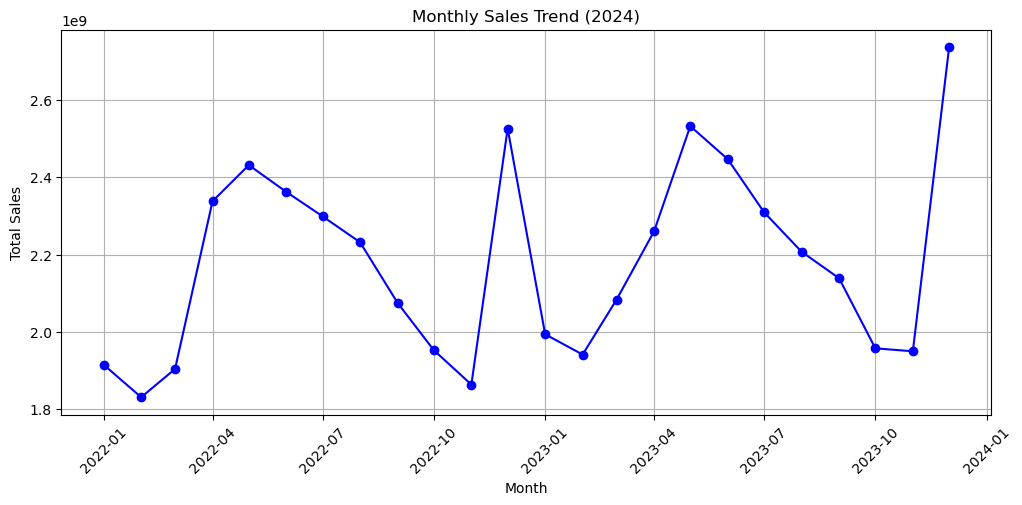

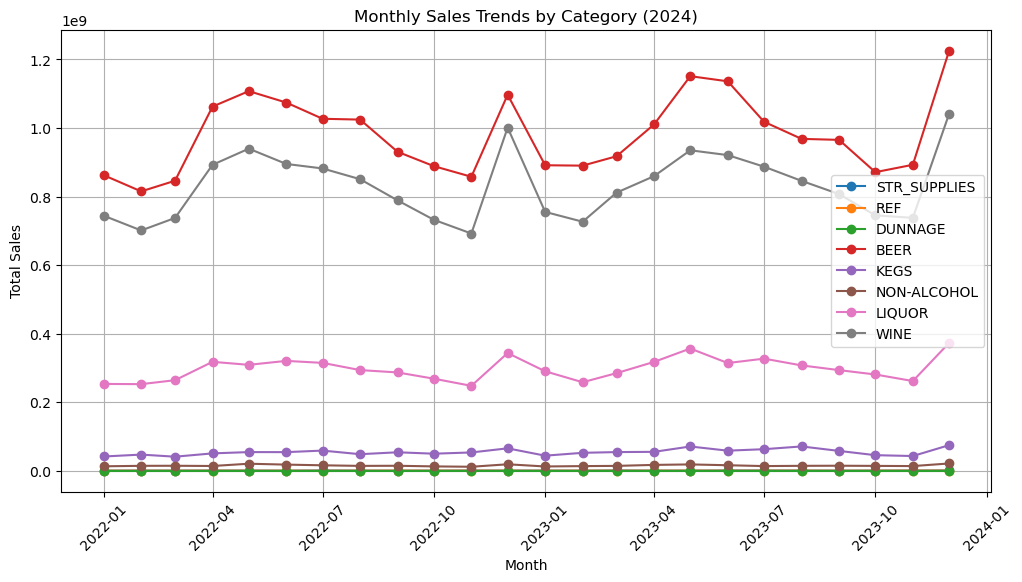

In [61]:
# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_historical.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_historical["Category"].unique():
    category_sales = df_historical[df_historical["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

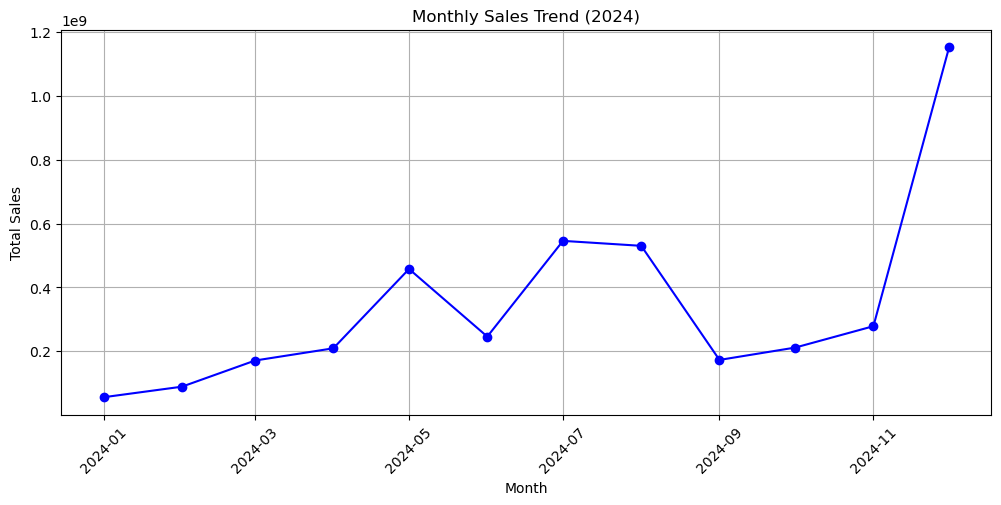

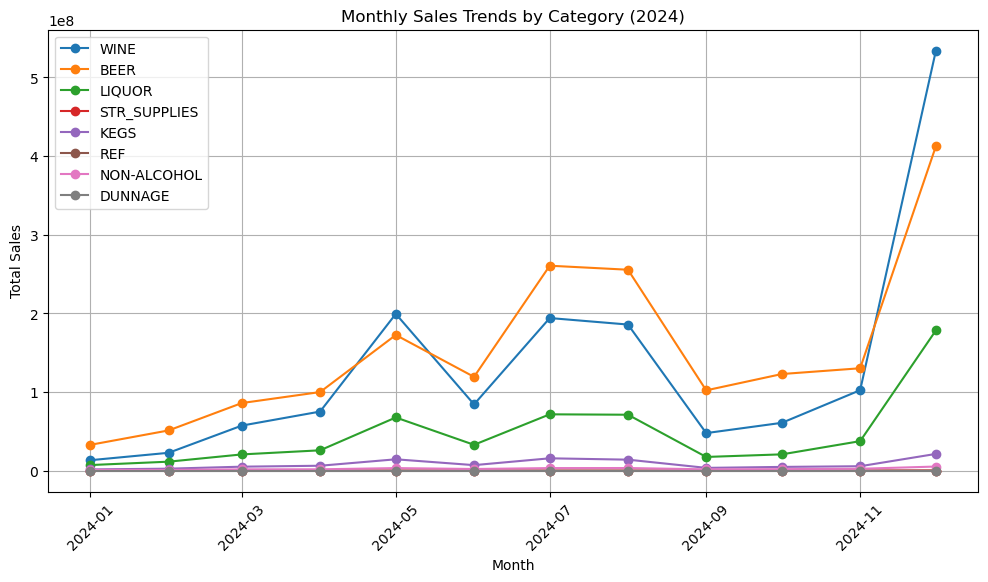

In [62]:
# 1️⃣ Aggregate Sales by Month to Check Trends
monthly_sales = df_2024.groupby("Month")["Sales"].sum()

# Plot the sales trend over months
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title("Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2️⃣ Category-Level Seasonality Trends
plt.figure(figsize=(12,6))
for category in df_2024["Category"].unique():
    category_sales = df_2024[df_2024["Category"] == category].groupby("Month")["Sales"].sum()
    plt.plot(category_sales.index, category_sales.values, marker='o', linestyle='-', label=category)

plt.title("Monthly Sales Trends by Category (2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Count the number of sales events per SKU per year
sku_sales_per_year = df_historical.groupby([df_historical["Month"].dt.year, "SKU"]).size().reset_index(name="Sales Events")

# Get statistics
print(sku_sales_per_year.groupby("Month")["Sales Events"].describe())


         count      mean       std  min  25%   50%   75%   max
Month                                                         
2022   26279.0  9.201378  4.137719  1.0  6.0  10.0  12.0  33.0
2023   26277.0  9.206607  4.124062  1.0  6.0  10.0  12.0  31.0


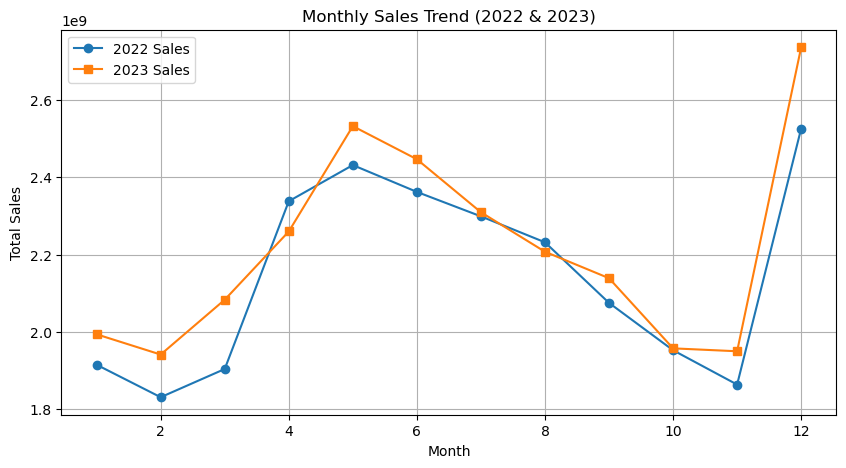

In [64]:
import matplotlib.pyplot as plt

# Aggregate total sales by month
monthly_sales_2022 = df_historical[df_historical["Month"].dt.year == 2022].groupby(df_historical["Month"].dt.month)["Sales"].sum()
monthly_sales_2023 = df_historical[df_historical["Month"].dt.year == 2023].groupby(df_historical["Month"].dt.month)["Sales"].sum()

# Plot sales trends
plt.figure(figsize=(10,5))
plt.plot(monthly_sales_2022, marker='o', label="2022 Sales")
plt.plot(monthly_sales_2023, marker='s', label="2023 Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend (2022 & 2023)")
plt.legend()
plt.grid(True)
plt.show()


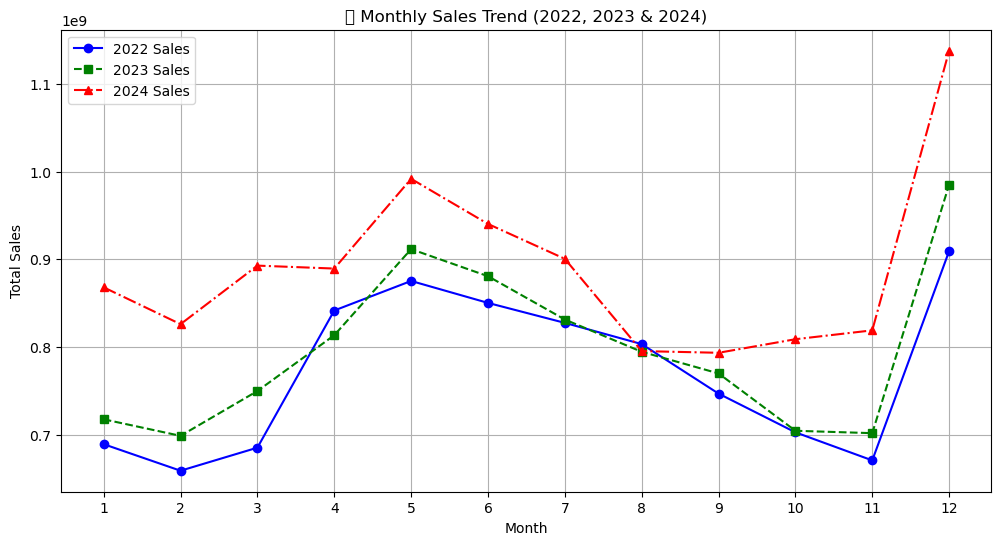

In [79]:
import matplotlib.pyplot as plt

# Aggregate total sales by month for each year
monthly_sales_2022 = df_historical[df_historical["Month"].dt.year == 2022].groupby(df_historical["Month"].dt.month)["Sales"].sum()
monthly_sales_2023 = df_historical[df_historical["Month"].dt.year == 2023].groupby(df_historical["Month"].dt.month)["Sales"].sum()
monthly_sales_2024 = df_2024.groupby(df_2024["Month"].dt.month)["Sales"].sum()  # Using df_2024 for 2024 data

# Plot sales trends
plt.figure(figsize=(12,6))
plt.plot(monthly_sales_2022, marker='o', linestyle='-', label="2022 Sales", color='blue')
plt.plot(monthly_sales_2023, marker='s', linestyle='--', label="2023 Sales", color='green')
plt.plot(monthly_sales_2024, marker='^', linestyle='-.', label="2024 Sales", color='red')

# Formatting the chart
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("📊 Monthly Sales Trend (2022, 2023 & 2024)")
plt.xticks(range(1, 13))  # Ensure x-axis labels show months 1-12
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Apply scaling factor to historical data (reduce by 40%)
df_historical["Sales"] = df_historical["Sales"] * 0.6

# Apply growth factor to 2024 (increase by 40%)
df_2024["Sales"] = df_2024["Sales"] * 1.4

# Round values
df_historical["Sales"] = df_historical["Sales"].round(2)
df_2024["Sales"] = df_2024["Sales"].round(2)
# Apply scaling factor to historical data (reduce by 40%)
df_historical["Sales"] = df_historical["Sales"] * 0.6

# Apply growth factor to 2024 (increase by 40%)
df_2024["Sales"] = df_2024["Sales"] * 1.4

# Round values
df_historical["Sales"] = df_historical["Sales"].round(2)
df_2024["Sales"] = df_2024["Sales"].round(2)


In [78]:
# Define scaling factors
scale_factors = {
    1: 1,  # Significantly scale up
    2: 1,
    3: 1,  # Moderate scale up
    4: 1,
    5: 1,
    7: 0.9,  # Slight scale down
    8: 1,
    9: 1,
    12: 1  # Significant scale down
}

# Apply scaling based on the month
for month, factor in scale_factors.items():
    df_2024.loc[df_2024["Month"].dt.month == month, "Sales"] *= factor

# Round sales for cleaner data
df_2024["Sales"] = df_2024["Sales"].round(2)

In [80]:
# Combine historical (2022-2023) and updated 2024 data
df_final = pd.concat([df_historical, df_2024], ignore_index=True)

In [81]:
df_final

,Month,SKU,Description,Category,Supplier,Sales,Sales_Adjusted
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,477.99,NaN
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8419.29,NaN
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45373.18,NaN
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.02,NaN
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,590.78,NaN
...,...,...,...,...,...,...,...
634174,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10743.93,15475.003974
634175,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.03,6744.878679
634176,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11169.73,14353.390001
634177,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177236.19,284858.068083


In [82]:
# Get unique suppliers in 2022 and 2023
suppliers_2022_2023 = df_final[df_final["Month"].dt.year.isin([2022, 2023])]["Supplier"].unique()

# Display the first few suppliers
print("Unique suppliers in 2022 & 2023:", suppliers_2022_2023[:10])  # Show first 10 for preview

# Check total count of unique suppliers
print("Total unique suppliers in 2022 & 2023:", len(suppliers_2022_2023))


Unique suppliers in 2022 & 2023: ['Default' 'PREMIUM DISTRIBUTORS INC' 'ANHEUSER BUSCH INC'
 'RELIABLE CHURCHILL LLLP' 'BROWN-FORMAN BEVERAGES WORLDWIDE'
 'KATCEF BROTHERS INC' 'TROEGS BREWING COMPANY'
 'DOGFISH HEAD CRAFT BREWERY LLC' 'MILLER BREWING COMPANY' 'LEGENDS LTD']
Total unique suppliers in 2022 & 2023: 356


In [83]:
# Get unique suppliers in 2024
suppliers_2024 = df_final[df_final["Month"].dt.year == 2024]["Supplier"].unique()

# Find suppliers present in 2022-2023 but NOT in 2024
extra_suppliers = set(suppliers_2022_2023) - set(suppliers_2024)
print("Suppliers in 2022-2023 but NOT in 2024:", extra_suppliers)

# Find suppliers present in 2024 but NOT in 2022-2023
missing_suppliers = set(suppliers_2024) - set(suppliers_2022_2023)
print("Suppliers in 2024 but NOT in 2022-2023:", missing_suppliers)


Suppliers in 2022-2023 but NOT in 2024: set()
Suppliers in 2024 but NOT in 2022-2023: set()


In [84]:
zero_sales_count = df_final[df_final["Sales"] == 0].shape[0]
print(f"Number of rows with Sales = 0: {zero_sales_count}")


Number of rows with Sales = 0: 5392


In [85]:
df_final = df_final[df_final["Sales"] > 0].copy()


In [86]:
df_final

,Month,SKU,Description,Category,Supplier,Sales,Sales_Adjusted
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,477.99,NaN
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8419.29,NaN
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45373.18,NaN
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.02,NaN
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,590.78,NaN
...,...,...,...,...,...,...,...
634174,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10743.93,15475.003974
634175,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.03,6744.878679
634176,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11169.73,14353.390001
634177,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177236.19,284858.068083


In [87]:
price_info=pd.read_csv("price_info.csv")

In [88]:
price_info

,SKU,Category,Average Category Cost,Unit Price
0,10346,BEER,8,8.0
1,100009,WINE,15,20.0
2,100012,WINE,15,18.0
3,100023,WINE,15,16.0
4,100024,WINE,15,10.0
...,...,...,...,...
26308,97799,BEER,8,6.0
26309,99279,BEER,8,10.0
26310,99686,BEER,8,8.0
26311,99770,BEER,8,6.0


In [89]:
# Merge price info into df_final
df_final = df_final.merge(price_info[['SKU', 'Unit Price']], on="SKU", how="left")

# Check for missing unit prices
missing_prices = df_final[df_final["Unit Price"].isna()]
print(f"Missing prices count: {missing_prices.shape[0]}")


Missing prices count: 0


In [90]:
# Ensure sales are a multiple of unit price
df_final["Sales"] = (df_final["Sales"] / df_final["Unit Price"]).round().astype(int) * df_final["Unit Price"]

# Verify
df_final["Valid Multiple"] = df_final["Sales"] % df_final["Unit Price"] == 0
invalid_sales = df_final[df_final["Valid Multiple"] == False]
print(f"Invalid sales count: {invalid_sales.shape[0]}")


Invalid sales count: 0


In [91]:
df_final

,Month,SKU,Description,Category,Supplier,Sales,Sales_Adjusted,Unit Price,Valid Multiple
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,480.0,NaN,5.0,True
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8420.0,NaN,4.0,True
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45372.0,NaN,4.0,True
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.0,NaN,5.0,True
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,588.0,NaN,6.0,True
...,...,...,...,...,...,...,...,...,...
628782,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10746.0,15475.003974,6.0,True
628783,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.0,6744.878679,50.0,True
628784,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11170.0,14353.390001,5.0,True
628785,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177240.0,284858.068083,10.0,True


In [92]:
df_final[df_final["SKU"]==10346]

,Month,SKU,Description,Category,Supplier,Sales,Sales_Adjusted,Unit Price,Valid Multiple
233,2022-01-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,17496.0,NaN,8.0,True
20177,2022-02-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,39608.0,NaN,8.0,True
40228,2022-03-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,31192.0,NaN,8.0,True
60230,2022-04-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,33008.0,NaN,8.0,True
80281,2022-05-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,98256.0,NaN,8.0,True
100212,2022-06-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,38288.0,NaN,8.0,True
120169,2022-07-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,25816.0,NaN,8.0,True
140043,2022-08-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,47704.0,NaN,8.0,True
160024,2022-09-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,27384.0,NaN,8.0,True
180059,2022-10-01,10346,KLOUD - 330/24 NR,BEER,YOUNG WON TRADING INC,45864.0,NaN,8.0,True


In [98]:
del(df_final["Valid Multiple"])

In [99]:
df_final

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,480.0
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8420.0
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45372.0
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.0
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,588.0
...,...,...,...,...,...,...
628782,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10746.0
628783,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.0
628784,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11170.0
628785,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177240.0


In [100]:
# Load updated df_final (which now has 2022, 2023, 2024)
df_final["Month"] = pd.to_datetime(df_final["Month"], format="%d/%m/%Y")

In [101]:
df_final

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,480.0
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8420.0
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45372.0
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.0
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,588.0
...,...,...,...,...,...,...
628782,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10746.0
628783,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.0
628784,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11170.0
628785,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177240.0


In [102]:
# Load updated df_final (which now has 2022, 2023, 2024)
df_final["Month"] = pd.to_datetime(df_final["Month"], format="%d/%m/%Y")

# Load previous inventory_info for reference
inventory_info = pd.read_csv("inventory_info.csv")

# Ensure SKU and Category mapping is correct
sku_categories = df_final[["SKU", "Category"]].drop_duplicates()

In [103]:
inventory_info

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,100007,WINE,1,0.0,NaN,NaN,False,NaN
1,100007,WINE,2,0.0,0.00,0.00,True,0.00
2,100007,WINE,3,0.0,0.00,0.00,True,0.00
3,100007,WINE,4,1000.0,1111.44,111.44,False,611.44
4,100007,WINE,5,1000.0,1272.90,272.90,False,772.90
...,...,...,...,...,...,...,...,...
315751,99990,BEER,8,2500.0,54688.10,52188.10,False,53438.10
315752,99990,BEER,9,0.0,52188.10,52188.10,False,52188.10
315753,99990,BEER,10,0.0,52188.10,52188.10,False,52188.10
315754,99990,BEER,11,0.0,52188.10,52188.10,False,52188.10


In [105]:
# Convert existing Month format (1,2,3...) to "01/MM/2024"
inventory_info["Month"] = inventory_info["Month"].apply(lambda x: f"01/{x}/2024")

# Convert to datetime format
inventory_info["Month"] = pd.to_datetime(inventory_info["Month"], format="%d/%m/%Y")

In [106]:
inventory_info

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,100007,WINE,2024-01-01,0.0,NaN,NaN,False,NaN
1,100007,WINE,2024-02-01,0.0,0.00,0.00,True,0.00
2,100007,WINE,2024-03-01,0.0,0.00,0.00,True,0.00
3,100007,WINE,2024-04-01,1000.0,1111.44,111.44,False,611.44
4,100007,WINE,2024-05-01,1000.0,1272.90,272.90,False,772.90
...,...,...,...,...,...,...,...,...
315751,99990,BEER,2024-08-01,2500.0,54688.10,52188.10,False,53438.10
315752,99990,BEER,2024-09-01,0.0,52188.10,52188.10,False,52188.10
315753,99990,BEER,2024-10-01,0.0,52188.10,52188.10,False,52188.10
315754,99990,BEER,2024-11-01,0.0,52188.10,52188.10,False,52188.10


In [107]:
# Function to generate inventory data with correct date format
def generate_inventory_data(df, year):
    inventory_records = []

    for sku in df["SKU"].unique():  # Loop through each SKU
        category = df[df["SKU"] == sku]["Category"].values[0]  # Get category
        monthly_sales = df[df["SKU"] == sku].groupby(df["Month"].dt.month)["Sales"].sum()

        # 1. Estimate Beginning Inventory (Using past sales as reference)
        beginning_inventory = 1.2 * monthly_sales.shift(1, fill_value=0)  # Slight buffer
        ending_inventory = beginning_inventory - monthly_sales  # Subtract sales from inventory
        ending_inventory[ending_inventory < 0] = 0  # Ensure no negative stock

        # 2. Mark stockout flag where ending inventory is zero
        stockout_flag = ending_inventory == 0

        # 3. Compute average inventory level per month
        avg_inventory = (beginning_inventory + ending_inventory) / 2

        # 4. Append inventory data for each month
        for month in range(1, 13):
            inventory_records.append({
                "SKU": sku,
                "Category": category,
                "Month": pd.to_datetime(f"01/{month}/{year}", format="%d/%m/%Y"),
                "Monthly Sales": monthly_sales.get(month, 0),
                "Beginning Inventory": beginning_inventory.get(month, 100),  # Default buffer
                "Ending Inventory": ending_inventory.get(month, 50),  # Default buffer
                "Stockout Flag": stockout_flag.get(month, False),
                "Average Monthly Inventory": avg_inventory.get(month, 75),  # Default
            })

    return pd.DataFrame(inventory_records)

# Generate inventory data for 2022 & 2023
inventory_2022 = generate_inventory_data(df_final[df_final["Month"].dt.year == 2022], 2022)
inventory_2023 = generate_inventory_data(df_final[df_final["Month"].dt.year == 2023], 2023)

In [108]:
inventory_2022

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,102,STR_SUPPLIES,2022-01-01,480.0,0.0,0.0,True,0.0
1,102,STR_SUPPLIES,2022-02-01,460.0,576.0,116.0,False,346.0
2,102,STR_SUPPLIES,2022-03-01,350.0,552.0,202.0,False,377.0
3,102,STR_SUPPLIES,2022-04-01,1320.0,420.0,0.0,True,210.0
4,102,STR_SUPPLIES,2022-05-01,320.0,1584.0,1264.0,False,1424.0
...,...,...,...,...,...,...,...,...
313099,389142,WINE,2022-08-01,0.0,100.0,50.0,False,75.0
313100,389142,WINE,2022-09-01,0.0,100.0,50.0,False,75.0
313101,389142,WINE,2022-10-01,0.0,100.0,50.0,False,75.0
313102,389142,WINE,2022-11-01,0.0,100.0,50.0,False,75.0


In [109]:
inventory_2023

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,102,STR_SUPPLIES,2023-01-01,845.0,0.0,0.0,True,0.0
1,102,STR_SUPPLIES,2023-02-01,345.0,1014.0,669.0,False,841.5
2,102,STR_SUPPLIES,2023-03-01,595.0,414.0,0.0,True,207.0
3,102,STR_SUPPLIES,2023-04-01,0.0,100.0,50.0,False,75.0
4,102,STR_SUPPLIES,2023-05-01,1180.0,714.0,0.0,True,357.0
...,...,...,...,...,...,...,...,...
313087,354350,WINE,2023-08-01,0.0,100.0,50.0,False,75.0
313088,354350,WINE,2023-09-01,0.0,100.0,50.0,False,75.0
313089,354350,WINE,2023-10-01,0.0,100.0,50.0,False,75.0
313090,354350,WINE,2023-11-01,0.0,100.0,50.0,False,75.0


In [111]:
# Count unique SKUs per year
unique_skus_2022 = inventory_2022["SKU"].nunique()
unique_skus_2023 = inventory_2023["SKU"].nunique()
unique_skus_2024 = inventory_info["SKU"].nunique()

print(f"Unique SKUs in 2022: {unique_skus_2022}")
print(f"Unique SKUs in 2023: {unique_skus_2023}")
print(f"Unique SKUs in 2024: {unique_skus_2024}")


Unique SKUs in 2022: 26092
Unique SKUs in 2023: 26091
Unique SKUs in 2024: 26313


In [112]:
# Check if every SKU appears exactly 12 times per year
sku_months_2022 = inventory_2022.groupby("SKU")["Month"].count()
sku_months_2023 = inventory_2023.groupby("SKU")["Month"].count()
sku_months_2024 = inventory_info.groupby("SKU")["Month"].count()

# Find SKUs missing months
missing_2022 = sku_months_2022[sku_months_2022 < 12]
missing_2023 = sku_months_2023[sku_months_2023 < 12]

print(f"SKUs with missing months in 2022: {missing_2022.shape[0]}")
print(f"SKUs with missing months in 2023: {missing_2023.shape[0]}")


SKUs with missing months in 2022: 0
SKUs with missing months in 2023: 0


In [114]:
# Find missing SKUs in 2022 & 2023
missing_skus_2022 = set(inventory_info["SKU"].unique()) - set(inventory_2022["SKU"].unique())
missing_skus_2023 = set(inventory_info["SKU"].unique()) - set(inventory_2023["SKU"].unique())

print(f"Missing SKUs in 2022: {len(missing_skus_2022)}")
print(f"Missing SKUs in 2023: {len(missing_skus_2023)}")


Missing SKUs in 2022: 221
Missing SKUs in 2023: 222


In [117]:
# Create missing SKU entries for each missing SKU in 2022 & 2023
missing_entries_2022 = []
missing_entries_2023 = []

# Generate inventory for missing SKUs
for sku in missing_skus_2022:
    category = inventory_info[inventory_info["SKU"] == sku]["Category"].values[0]
    
    for month in range(1, 13):
        missing_entries_2022.append({
            "SKU": sku, 
            "Category": category, 
            "Month": f"01/{month}/2022",  # Match date format
            "Beginning Inventory": 0, 
            "Ending Inventory": 0, 
            "Stockout Flag": True  # Assume stockout since no sales data exists
        })

for sku in missing_skus_2023:
    category = inventory_info[inventory_info["SKU"] == sku]["Category"].values[0]
    
    for month in range(1, 13):
        missing_entries_2023.append({
            "SKU": sku, 
            "Category": category, 
            "Month": f"01/{month}/2023",
            "Beginning Inventory": 0, 
            "Ending Inventory": 0, 
            "Stockout Flag": True
        })

# Convert missing entries into DataFrame
missing_df_2022 = pd.DataFrame(missing_entries_2022)
missing_df_2023 = pd.DataFrame(missing_entries_2023)

# Append the missing data back to inventory_2022 & inventory_2023
inventory_2022 = pd.concat([inventory_2022, missing_df_2022], ignore_index=True)
inventory_2023 = pd.concat([inventory_2023, missing_df_2023], ignore_index=True)


In [119]:
inventory_2023

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,102,STR_SUPPLIES,2023-01-01 00:00:00,845.0,0.0,0.0,True,0.0
1,102,STR_SUPPLIES,2023-02-01 00:00:00,345.0,1014.0,669.0,False,841.5
2,102,STR_SUPPLIES,2023-03-01 00:00:00,595.0,414.0,0.0,True,207.0
3,102,STR_SUPPLIES,2023-04-01 00:00:00,0.0,100.0,50.0,False,75.0
4,102,STR_SUPPLIES,2023-05-01 00:00:00,1180.0,714.0,0.0,True,357.0
...,...,...,...,...,...,...,...,...
315751,87550,WINE,01/8/2023,NaN,0.0,0.0,True,NaN
315752,87550,WINE,01/9/2023,NaN,0.0,0.0,True,NaN
315753,87550,WINE,01/10/2023,NaN,0.0,0.0,True,NaN
315754,87550,WINE,01/11/2023,NaN,0.0,0.0,True,NaN


In [121]:
# Function to check inventory consistency for each year
def check_inventory_consistency(inventory_df, sales_df, year):
    print(f"\n🔍 Checking Inventory for {year}...\n")

    # Convert Month to datetime to facilitate sorting
    inventory_df["Month"] = pd.to_datetime(inventory_df["Month"], format="%d/%m/%Y")
    
    # Sort data by SKU & Month
    inventory_df = inventory_df.sort_values(by=["SKU", "Month"])

    # Merge with sales data to get monthly sales
    inventory_df = inventory_df.merge(
        sales_df[["SKU", "Month", "Sales"]],
        on=["SKU", "Month"],
        how="left"
    )

    # Fill missing sales with 0 (for SKUs with no sales in that month)
    inventory_df["Sales"] = inventory_df["Sales"].fillna(0)

    # Rule 1: Check if Beginning Inventory is smaller than Previous Month's Ending Inventory
    inventory_df["Prev Month Ending Inventory"] = inventory_df.groupby("SKU")["Ending Inventory"].shift(1)
    rule1_violations = inventory_df[inventory_df["Beginning Inventory"] < inventory_df["Prev Month Ending Inventory"]]

    # Rule 2: Check if Beginning Inventory is smaller than Monthly Sales
    rule2_violations = inventory_df[inventory_df["Beginning Inventory"] < inventory_df["Sales"]]

    print(f"❌ Rule 1 Violations (Beginning < Previous Month's Ending): {len(rule1_violations)}")
    print(f"❌ Rule 2 Violations (Beginning < Sales): {len(rule2_violations)}")

    return inventory_df, rule1_violations, rule2_violations

# Check consistency for each year
inventory_2022_checked, rule1_2022, rule2_2022 = check_inventory_consistency(inventory_2022, df_final, 2022)
inventory_2023_checked, rule1_2023, rule2_2023 = check_inventory_consistency(inventory_2023, df_final, 2023)
inventory_2024_checked, rule1_2024, rule2_2024 = check_inventory_consistency(inventory_info, df_final, 2024)



🔍 Checking Inventory for 2022...

❌ Rule 1 Violations (Beginning < Previous Month's Ending): 68386
❌ Rule 2 Violations (Beginning < Sales): 114828

🔍 Checking Inventory for 2023...

❌ Rule 1 Violations (Beginning < Previous Month's Ending): 68425
❌ Rule 2 Violations (Beginning < Sales): 114325

🔍 Checking Inventory for 2024...

❌ Rule 1 Violations (Beginning < Previous Month's Ending): 631
❌ Rule 2 Violations (Beginning < Sales): 148103


In [123]:
# Check how many unique SKUs are affected by the violations
print("🔍 Checking how many SKUs are affected by violations...")

# Count unique SKUs affected by Rule 1
rule1_skus_2022 = rule1_2022["SKU"].nunique()
rule1_skus_2023 = rule1_2023["SKU"].nunique()
rule1_skus_2024 = rule1_2024["SKU"].nunique()

# Count unique SKUs affected by Rule 2
rule2_skus_2022 = rule2_2022["SKU"].nunique()
rule2_skus_2023 = rule2_2023["SKU"].nunique()
rule2_skus_2024 = rule2_2024["SKU"].nunique()

# Count unique months affected
rule1_months_2022 = rule1_2022["Month"].nunique()
rule1_months_2023 = rule1_2023["Month"].nunique()
rule1_months_2024 = rule1_2024["Month"].nunique()

print(f"❌ Rule 1 (Prev Month Ending < Beginning Inventory) - Affected SKUs:")
print(f"2022: {rule1_skus_2022} SKUs | Affected Months: {rule1_months_2022}")
print(f"2023: {rule1_skus_2023} SKUs | Affected Months: {rule1_months_2023}")
print(f"2024: {rule1_skus_2024} SKUs | Affected Months: {rule1_months_2024}\n")

print(f"❌ Rule 2 (Beginning Inventory < Sales) - Affected SKUs:")
print(f"2022: {rule2_skus_2022} SKUs | Affected Months: {rule1_months_2022}")
print(f"2023: {rule2_skus_2023} SKUs | Affected Months: {rule1_months_2023}")
print(f"2024: {rule2_skus_2024} SKUs | Affected Months: {rule1_months_2024}\n")


🔍 Checking how many SKUs are affected by violations...
❌ Rule 1 (Prev Month Ending < Beginning Inventory) - Affected SKUs:
2022: 25547 SKUs | Affected Months: 11
2023: 25582 SKUs | Affected Months: 11
2024: 617 SKUs | Affected Months: 9

❌ Rule 2 (Beginning Inventory < Sales) - Affected SKUs:
2022: 26090 SKUs | Affected Months: 11
2023: 26089 SKUs | Affected Months: 11
2024: 26126 SKUs | Affected Months: 9



In [94]:
#Convert 'Month' to datetime format if it's not already
df_final["Month"] = pd.to_datetime(df_final["Month"], format="%d/%m/%Y")

# Aggregate sales by month and category
monthly_sales_by_category = df_final.groupby([df_final["Month"].dt.to_period("M"), "Category"])["Sales"].sum().reset_index()

# Convert 'Month' back to datetime for plotting
monthly_sales_by_category["Month"] = monthly_sales_by_category["Month"].astype(str)
monthly_sales_by_category["Month"] = pd.to_datetime(monthly_sales_by_category["Month"])

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

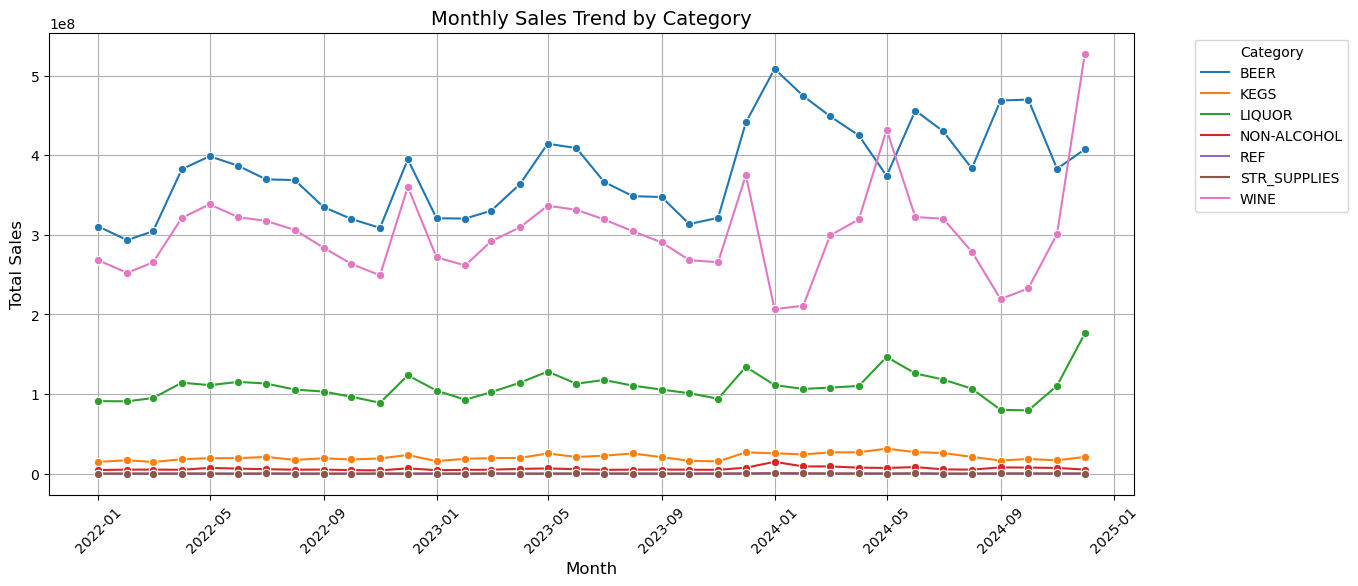

In [95]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales_by_category, x="Month", y="Sales", hue="Category", marker="o")

plt.title("Monthly Sales Trend by Category", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(True)
plt.show()


In [124]:
df_final

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,480.0
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8420.0
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45372.0
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.0
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,588.0
...,...,...,...,...,...,...
628782,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10746.0
628783,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.0
628784,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11170.0
628785,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177240.0


In [125]:
df_final.to_csv("main_extended.csv", index= False)

## FORECASTING MODEL 1: PROPHET

In [126]:
df = pd.read_csv("main_extended.csv")

In [127]:
df

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,480.0
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8420.0
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45372.0
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.0
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,588.0
...,...,...,...,...,...,...
628782,2024-12-01,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,10746.0
628783,2024-12-01,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,COASTAL BREWING COMPANY LLC,4800.0
628784,2024-12-01,9989,VICTORY STORM KING 4/6NR - 12OZ,BEER,KATCEF BROTHERS INC,11170.0
628785,2024-12-01,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,COASTAL BREWING COMPANY LLC,177240.0


In [129]:
# Convert 'Month' to datetime format (since it's already in YYYY-MM-DD)
df["ds"] = pd.to_datetime(df["Month"])  # No need for format specifier

# Rename 'Sales' column to 'y' for Prophet
df["y"] = df["Sales"]

# Keep only necessary columns
df_prophet = df[["ds", "y"]]

# Verify dataset
print(df_prophet.head())

          ds        y
0 2022-01-01    480.0
1 2022-01-01   8420.0
2 2022-01-01  45372.0
3 2022-01-01   3505.0
4 2022-01-01    588.0


In [130]:
df_prophet

,ds,y
0,2022-01-01,480.0
1,2022-01-01,8420.0
2,2022-01-01,45372.0
3,2022-01-01,3505.0
4,2022-01-01,588.0
...,...,...
628782,2024-12-01,10746.0
628783,2024-12-01,4800.0
628784,2024-12-01,11170.0
628785,2024-12-01,177240.0


In [131]:
!pip install prophet

python(46553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [132]:
from prophet import Prophet

In [134]:
# Convert 'Month' to datetime format (already in YYYY-MM-DD)
df["Month"] = pd.to_datetime(df["Month"])

# Split data into training (2022-2023) and actual test data (2024)
df_train = df[(df["Month"].dt.year == 2022) | (df["Month"].dt.year == 2023)]
df_actual_2024 = df[df["Month"].dt.year == 2024]

# Prepare data for Prophet (rename columns)
df_train = df_train.rename(columns={"Month": "ds", "Sales": "y"})[["ds", "y"]]

# Verify
print(df_train.head())
print(df_actual_2024.head())

          ds         ds        y        y
0 2022-01-01 2022-01-01    480.0    480.0
1 2022-01-01 2022-01-01   8420.0   8420.0
2 2022-01-01 2022-01-01  45372.0  45372.0
3 2022-01-01 2022-01-01   3505.0   3505.0
4 2022-01-01 2022-01-01    588.0    588.0
            Month     SKU                      Description Category  \
479868 2024-01-01  100009              BOOTLEG RED - 750ML     WINE   
479869 2024-01-01  100012              PAPI P/GRIG - 750ML     WINE   
479870 2024-01-01  100023  CH PARADIS-TERRE DES ANGES ROSE     WINE   
479871 2024-01-01  100024        MOMENT DE PLAISIR - 750ML     WINE   
479872 2024-01-01  100080  KEDEM CREAM RED CONCORD - 750ML     WINE   

                                 Supplier   Sales         ds       y  
479868  REPUBLIC NATIONAL DISTRIBUTING CO   240.0 2024-01-01   240.0  
479869            INTERBALT PRODUCTS CORP  3384.0 2024-01-01  3384.0  
479870                          PWSWN INC  3440.0 2024-01-01  3440.0  
479871                          PWSWN

In [137]:
# Convert 'Month' to datetime format
df["Month"] = pd.to_datetime(df["Month"])

# Split data into training (2022-2023) and actual test data (2024)
df_train = df[(df["Month"].dt.year == 2022) | (df["Month"].dt.year == 2023)][["Month", "Sales"]]
df_actual_2024 = df[df["Month"].dt.year == 2024][["Month", "Sales"]]

# Rename columns for Prophet (ds = datetime, y = target variable)
df_train = df_train.rename(columns={"Month": "ds", "Sales": "y"})

# Verify structure
print(df_train.head())
print(df_actual_2024.head())

          ds        y
0 2022-01-01    480.0
1 2022-01-01   8420.0
2 2022-01-01  45372.0
3 2022-01-01   3505.0
4 2022-01-01    588.0
            Month   Sales
479868 2024-01-01   240.0
479869 2024-01-01  3384.0
479870 2024-01-01  3440.0
479871 2024-01-01  5500.0
479872 2024-01-01  3230.0


In [138]:
# Convert 'Month' to datetime format
df["Month"] = pd.to_datetime(df["Month"])

# Split data into training (2022-2023) and actual test data (2024)
df_train = df[(df["Month"].dt.year == 2022) | (df["Month"].dt.year == 2023)][["Month", "Sales"]]
df_actual_2024 = df[df["Month"].dt.year == 2024][["Month", "Sales"]]

# Rename columns for Prophet (ds = datetime, y = target variable)
df_train = df_train.rename(columns={"Month": "ds", "Sales": "y"})

# Verify structure
print(df_train.head())
print(df_actual_2024.head())

          ds        y
0 2022-01-01    480.0
1 2022-01-01   8420.0
2 2022-01-01  45372.0
3 2022-01-01   3505.0
4 2022-01-01    588.0
            Month   Sales
479868 2024-01-01   240.0
479869 2024-01-01  3384.0
479870 2024-01-01  3440.0
479871 2024-01-01  5500.0
479872 2024-01-01  3230.0


In [139]:
df_train

,ds,y
0,2022-01-01,480.0
1,2022-01-01,8420.0
2,2022-01-01,45372.0
3,2022-01-01,3505.0
4,2022-01-01,588.0
...,...,...
479863,2023-12-01,1476.0
479864,2023-12-01,380.0
479865,2023-12-01,65620.0
479866,2023-12-01,22785.0


In [140]:
df_actual_2024

,Month,Sales
479868,2024-01-01,240.0
479869,2024-01-01,3384.0
479870,2024-01-01,3440.0
479871,2024-01-01,5500.0
479872,2024-01-01,3230.0
...,...,...
628782,2024-12-01,10746.0
628783,2024-12-01,4800.0
628784,2024-12-01,11170.0
628785,2024-12-01,177240.0


In [146]:

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)

# Fit model on training data (2022-2023)
model.fit(df_train)


15:29:07 - cmdstanpy - INFO - Chain [1] start processing
python(46845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
15:29:18 - cmdstanpy - INFO - Chain [1] done processing


In [147]:
# Create future dataframe (12 months ahead for 2024)
future = model.make_future_dataframe(periods=12, freq="M")

# Predict future sales
forecast = model.predict(future)

# Display forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)  # Showing last 12 months (2024)



,ds,yhat,yhat_lower,yhat_upper
24,2023-12-31,37512.005569,-153143.629069,242157.831300
25,2024-01-31,38810.619446,-163249.125865,236068.524707
26,2024-02-29,42932.668575,-143626.739089,231079.727071
27,2024-03-31,46301.707605,-131820.285730,239757.364948
28,2024-04-30,52483.869334,-139198.075584,247315.493580
29,2024-05-31,51256.020131,-136269.563130,251345.614966
30,2024-06-30,49039.601987,-159664.827730,238921.788490
31,2024-07-31,47480.522147,-159275.863606,240571.581865
32,2024-08-31,46205.564950,-151117.520889,232245.572129
33,2024-09-30,42769.398686,-147441.735572,226890.330247


In [154]:
forecast["ds"] = forecast["ds"]+ pd.DateOffset(days=1)

In [155]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-02,36284.238161,-168492.542778,233470.474897,36284.238161,36284.238161,-2068.598166,-2068.598166,-2068.598166,-2068.598166,-2068.598166,-2068.598166,0.0,0.0,0.0,34215.639995
1,2022-02-02,36535.612791,-170637.422357,243175.252185,36535.612791,36535.612791,-3610.609429,-3610.609429,-3610.609429,-3610.609429,-3610.609429,-3610.609429,0.0,0.0,0.0,32925.003362
2,2022-03-02,36885.808493,-151030.499725,230222.474838,36885.808493,36885.808493,-2203.031755,-2203.031755,-2203.031755,-2203.031755,-2203.031755,-2203.031755,0.0,0.0,0.0,34682.776738
3,2022-04-02,37396.204435,-154943.237790,238413.827473,37396.204435,37396.204435,3919.853795,3919.853795,3919.853795,3919.853795,3919.853795,3919.853795,0.0,0.0,0.0,41316.058231
4,2022-05-02,37856.023582,-165928.566735,233919.855712,37856.023582,37856.023582,6350.160456,6350.160456,6350.160456,6350.160456,6350.160456,6350.160456,0.0,0.0,0.0,44206.184038
5,2022-06-02,38384.780697,-149059.863423,229572.172595,38384.780697,38384.780697,4552.211260,4552.211260,4552.211260,4552.211260,4552.211260,4552.211260,0.0,0.0,0.0,42936.991957
6,2022-07-02,38935.717755,-148523.224533,223945.940554,38935.717755,38935.717755,2711.961013,2711.961013,2711.961013,2711.961013,2711.961013,2711.961013,0.0,0.0,0.0,41647.678767
7,2022-08-02,39346.660404,-143468.079728,246193.358965,39346.660404,39346.660404,811.239323,811.239323,811.239323,811.239323,811.239323,811.239323,0.0,0.0,0.0,40157.899726
8,2022-09-02,39589.669426,-151287.257247,233948.973785,39589.669426,39589.669426,-2095.928104,-2095.928104,-2095.928104,-2095.928104,-2095.928104,-2095.928104,0.0,0.0,0.0,37493.741322
9,2022-10-02,39664.113310,-151425.596852,228959.189648,39664.113310,39664.113310,-4726.911227,-4726.911227,-4726.911227,-4726.911227,-4726.911227,-4726.911227,0.0,0.0,0.0,34937.202083


In [148]:
# Merge actual 2024 data with the forecast
df_results = forecast[["ds", "yhat"]].merge(df_actual_2024, left_on="ds", right_on="Month", how="left")

# Rename columns for clarity
df_results = df_results.rename(columns={"yhat": "Forecasted Sales", "Sales": "Actual Sales"})

# Display results
print(df_results.tail(12))  # Last 12 months



           ds  Forecasted Sales Month  Actual Sales
24 2023-12-31      37512.005569   NaT           NaN
25 2024-01-31      38810.619446   NaT           NaN
26 2024-02-29      42932.668575   NaT           NaN
27 2024-03-31      46301.707605   NaT           NaN
28 2024-04-30      52483.869334   NaT           NaN
29 2024-05-31      51256.020131   NaT           NaN
30 2024-06-30      49039.601987   NaT           NaN
31 2024-07-31      47480.522147   NaT           NaN
32 2024-08-31      46205.564950   NaT           NaN
33 2024-09-30      42769.398686   NaT           NaN
34 2024-10-31      43261.128998   NaT           NaN
35 2024-11-30      57545.823702   NaT           NaN


In [156]:
# Ensure 'Month' is datetime format
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m-%d")

# Split into training (2022-2023) and actual (2024) data
df_train = df[df["Month"].dt.year.isin([2022, 2023])].copy()
df_actual_2024 = df[df["Month"].dt.year == 2024].copy()

# Summarize sales per month
df_train_grouped = df_train.groupby("Month")["Sales"].sum().reset_index()
df_actual_2024_grouped = df_actual_2024.groupby("Month")["Sales"].sum().reset_index()

# Rename columns for Prophet
df_train_grouped = df_train_grouped.rename(columns={"Month": "ds", "Sales": "y"})

# Display sample of training data
print(df_train_grouped.head())

          ds            y
0 2022-01-01  689286227.0
1 2022-02-01  659027696.0
2 2022-03-01  685317791.0
3 2022-04-01  841690397.0
4 2022-05-01  875393131.0


In [157]:
df_train_grouped

,ds,y
0,2022-01-01,689286227.0
1,2022-02-01,659027696.0
2,2022-03-01,685317791.0
3,2022-04-01,841690397.0
4,2022-05-01,875393131.0
5,2022-06-01,850382381.0
6,2022-07-01,827605481.0
7,2022-08-01,803410768.0
8,2022-09-01,746944715.0
9,2022-10-01,702805430.0


In [158]:
# Initialize Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Fit the model
model.fit(df_train_grouped)


15:41:58 - cmdstanpy - INFO - Chain [1] start processing
python(47013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
15:42:19 - cmdstanpy - INFO - Chain [1] done processing


In [159]:
# Create a dataframe with future dates (2024)
future_dates = model.make_future_dataframe(periods=12, freq="M")

# Forecast sales for 2024
forecast = model.predict(future_dates)

# Select relevant columns
forecast = forecast[["ds", "yhat"]]

# Display forecasted values
print(forecast.tail())


           ds          yhat
31 2024-07-31  8.599806e+08
32 2024-08-31  8.623107e+08
33 2024-09-30  7.704930e+08
34 2024-10-31  7.864695e+08
35 2024-11-30  1.102076e+09


In [160]:
forecast

,ds,yhat
0,2022-01-01,6.892857e+08
1,2022-02-01,6.590273e+08
2,2022-03-01,6.853180e+08
3,2022-04-01,8.416905e+08
4,2022-05-01,8.753929e+08
5,2022-06-01,8.503818e+08
6,2022-07-01,8.276063e+08
7,2022-08-01,8.034102e+08
8,2022-09-01,7.469449e+08
9,2022-10-01,7.028058e+08


In [161]:
forecast["ds"] = forecast["ds"] + pd.DateOffset(days=1)


In [162]:
forecast

,ds,yhat
0,2022-01-02,6.892857e+08
1,2022-02-02,6.590273e+08
2,2022-03-02,6.853180e+08
3,2022-04-02,8.416905e+08
4,2022-05-02,8.753929e+08
5,2022-06-02,8.503818e+08
6,2022-07-02,8.276063e+08
7,2022-08-02,8.034102e+08
8,2022-09-02,7.469449e+08
9,2022-10-02,7.028058e+08


In [164]:
# Ensure both date columns are in correct datetime format
forecast["ds"] = pd.to_datetime(forecast["ds"])
df_actual_2024_grouped["Month"] = pd.to_datetime(df_actual_2024_grouped["Month"])

# Round both to the start of the month to match exactly
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
df_actual_2024_grouped["Month"] = df_actual_2024_grouped["Month"].dt.to_period("M").dt.to_timestamp()

# Now merge
df_results = forecast.merge(df_actual_2024_grouped, left_on="ds", right_on="Month", how="left")

# Rename columns for clarity
df_results = df_results.rename(columns={"yhat": "Forecasted Sales", "Sales": "Actual Sales"})

# Drop duplicate Month column
df_results.drop(columns=["Month"], inplace=True)

# Display merged results
print(df_results)



           ds  Forecasted Sales  Actual Sales
0  2022-01-01      6.892857e+08           NaN
1  2022-02-01      6.590273e+08           NaN
2  2022-03-01      6.853180e+08           NaN
3  2022-04-01      8.416905e+08           NaN
4  2022-05-01      8.753929e+08           NaN
5  2022-06-01      8.503818e+08           NaN
6  2022-07-01      8.276063e+08           NaN
7  2022-08-01      8.034102e+08           NaN
8  2022-09-01      7.469449e+08           NaN
9  2022-10-01      7.028058e+08           NaN
10 2022-11-01      6.708071e+08           NaN
11 2022-12-01      9.094570e+08           NaN
12 2023-01-01      7.176612e+08           NaN
13 2023-02-01      6.987889e+08           NaN
14 2023-03-01      7.498985e+08           NaN
15 2023-04-01      8.134993e+08           NaN
16 2023-05-01      9.116817e+08           NaN
17 2023-06-01      8.808200e+08           NaN
18 2023-07-01      8.314319e+08           NaN
19 2023-08-01      7.946320e+08           NaN
20 2023-09-01      7.699555e+08   

In [165]:
# Keep only rows for 2024
df_results_2024 = df_results[df_results["ds"].dt.year == 2024].copy()

# Verify the filtered dataframe
print(df_results_2024)


           ds  Forecasted Sales  Actual Sales
24 2024-01-01      6.234335e+08  8.681336e+08
25 2024-02-01      7.493870e+08  8.261234e+08
26 2024-03-01      8.478839e+08  8.928898e+08
27 2024-04-01      8.347389e+08  8.895417e+08
28 2024-05-01      1.010689e+09  9.918482e+08
29 2024-06-01      9.835857e+08  9.404240e+08
30 2024-07-01      9.127538e+08  9.006140e+08
31 2024-08-01      8.599806e+08  7.954411e+08
32 2024-09-01      8.623107e+08  7.935028e+08
33 2024-10-01      7.704930e+08  8.089719e+08
34 2024-11-01      7.864695e+08  8.190862e+08
35 2024-12-01      1.102076e+09  1.137922e+09


In [166]:
# Calculate Absolute Percentage Error (APE)
df_results["Absolute Error"] = abs(df_results["Actual Sales"] - df_results["Forecasted Sales"])
df_results["APE"] = df_results["Absolute Error"] / df_results["Actual Sales"]

# Compute MAPE
forecast_accuracy = 100 - (df_results["APE"].mean() * 100)
print(f"Forecast Accuracy: {forecast_accuracy:.2f}%")


Forecast Accuracy: 92.90%


In [172]:
def mape(y_actual, y_pred):
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape_score = mape(df_results_2024["Actual Sales"], df_results_2024["Forecasted Sales"])
print(f"MAPE: {mape_score:.2f}%")


MAPE: 7.10%


In [170]:
from sklearn.metrics import mean_squared_error

rmse_score = np.sqrt(mean_squared_error(df_results_2024["Actual Sales"], df_results_2024["Forecasted Sales"]))
print(f"RMSE: {rmse_score:.2f}")


RMSE: 84602060.54


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [171]:
def smape(y_actual, y_pred):
    return np.mean(2 * np.abs(y_actual - y_pred) / (np.abs(y_actual) + np.abs(y_pred))) * 100

smape_score = smape(df_results_2024["Actual Sales"], df_results_2024["Forecasted Sales"])
print(f"SMAPE: {smape_score:.2f}%")


SMAPE: 7.50%


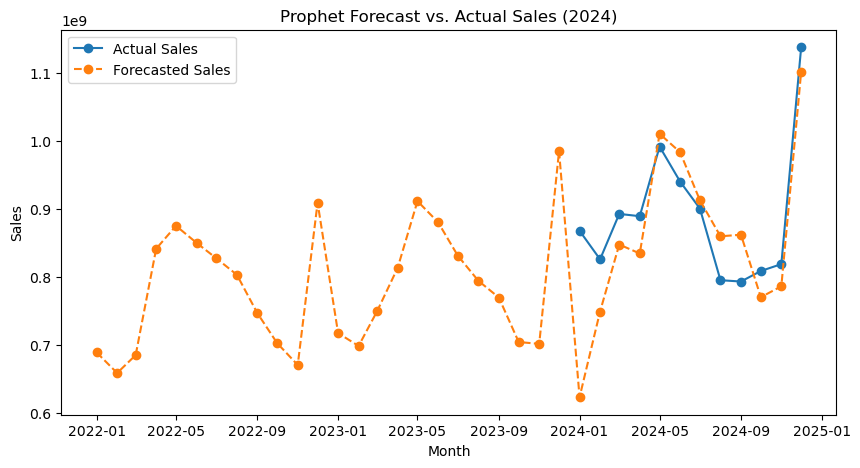

In [173]:
plt.figure(figsize=(10,5))

# Plot Actual Sales (solid line)
plt.plot(df_results["ds"], df_results["Actual Sales"], label="Actual Sales", marker="o")

# Plot Forecasted Sales (dashed line)
plt.plot(df_results["ds"], df_results["Forecasted Sales"], label="Forecasted Sales", linestyle="dashed", marker="o")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Prophet Forecast vs. Actual Sales (2024)")
plt.legend()
plt.show()


## FORECAST MODEL 2: SARIMA



In [174]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [175]:
# Load the dataset (Ensure 'Month' is in datetime format)
df = pd.read_csv("main_extended.csv", parse_dates=["Month"])
df = df.sort_values(by="Month")  # Ensure chronological order

# Filter training data (2022-2023)
df_train = df[df["Month"] < "2024-01-01"]

# Filter test data (2024) for accuracy evaluation
df_test = df[df["Month"] >= "2024-01-01"]

# Aggregate sales by month
df_train = df_train.groupby("Month")["Sales"].sum().reset_index()
df_test = df_test.groupby("Month")["Sales"].sum().reset_index()

# Set 'Month' as index
df_train.set_index("Month", inplace=True)
df_test.set_index("Month", inplace=True)


In [177]:

!pip install pmdarima

python(47864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.2/656.2 kB 6.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [179]:
from pmdarima import auto_arima

# Auto-select best (p,d,q) and seasonal (P,D,Q,s) parameters
auto_model = auto_arima(df_train["Sales"], 
                        seasonal=True, 
                        m=12,  # Monthly seasonality
                        stepwise=True, 
                        suppress_warnings=True,
                        D=0)  # Manually set seasonal differencing to 0


# Print best SARIMA order
print("Best SARIMA Order:", auto_model.order)
print("Best Seasonal Order:", auto_model.seasonal_order)

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Best SARIMA Order: (0, 0, 1)
Best Seasonal Order: (0, 0, 1, 12)


In [180]:
# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df_train["Sales"], 
                                         order=auto_model.order, 
                                         seasonal_order=auto_model.seasonal_order,
                                         enforce_stationarity=False, 
                                         enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71763D+00    |proj g|=  3.02659D+00

At iterate    5    f=  8.92620D+00    |proj g|=  5.63006D-03

At iterate   10    f=  8.92510D+00    |proj g|=  6.86808D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   1.759D-06   8.925D+00
  F =   8.9251000647636545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


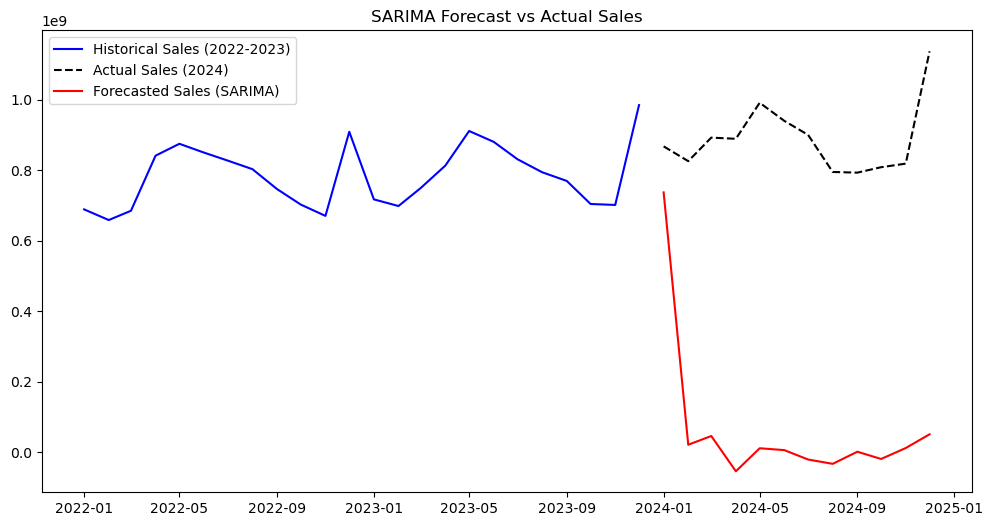

In [181]:
# Forecast for 12 months (2024)
forecast_steps = 12
forecast_index = pd.date_range(start="2024-01-01", periods=forecast_steps, freq='MS')

# Predict future sales
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = sarima_forecast.predicted_mean

# Create forecast DataFrame
df_sarima_forecast = pd.DataFrame({"Month": forecast_index, "Forecasted Sales": forecast_values})
df_sarima_forecast.set_index("Month", inplace=True)

# Plot actual vs predicted sales
plt.figure(figsize=(12,6))
plt.plot(df_train.index, df_train["Sales"], label="Historical Sales (2022-2023)", color="blue")
plt.plot(df_test.index, df_test["Sales"], label="Actual Sales (2024)", color="black", linestyle="dashed")
plt.plot(df_sarima_forecast.index, df_sarima_forecast["Forecasted Sales"], label="Forecasted Sales (SARIMA)", color="red")
plt.legend()
plt.title("SARIMA Forecast vs Actual Sales")
plt.show()


In [182]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Merge actual 2024 sales with SARIMA forecasts
df_results_sarima = df_test.copy()
df_results_sarima["Forecasted Sales"] = df_sarima_forecast["Forecasted Sales"]

# Compute forecast accuracy metrics
mape_sarima = mean_absolute_percentage_error(df_results_sarima["Sales"], df_results_sarima["Forecasted Sales"]) * 100
rmse_sarima = np.sqrt(mean_squared_error(df_results_sarima["Sales"], df_results_sarima["Forecasted Sales"]))
smape_sarima = np.mean(2 * np.abs(df_results_sarima["Sales"] - df_results_sarima["Forecasted Sales"]) /
                        (np.abs(df_results_sarima["Sales"]) + np.abs(df_results_sarima["Forecasted Sales"]))) * 100

# Print Accuracy Scores
print(f"📊 SARIMA Forecast Accuracy:")
print(f"✅ MAPE: {mape_sarima:.2f}%")
print(f"✅ RMSE: {rmse_sarima:.2f}")
print(f"✅ SMAPE: {smape_sarima:.2f}%")


📊 SARIMA Forecast Accuracy:
✅ MAPE: 92.85%
✅ RMSE: 855663424.53
✅ SMAPE: 179.64%


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [187]:
df_results_sarima

,Sales,Forecasted Sales
Month,,
2024-01-01,8.681336e+08,7.375152e+08
2024-02-01,8.261234e+08,2.138676e+07
2024-03-01,8.928898e+08,4.614158e+07
2024-04-01,8.895417e+08,-5.393253e+07
2024-05-01,9.918482e+08,1.140557e+07
2024-06-01,9.404240e+08,6.127271e+06
2024-07-01,9.006140e+08,-2.057698e+07
2024-08-01,7.954411e+08,-3.282699e+07
2024-09-01,7.935028e+08,1.549395e+06


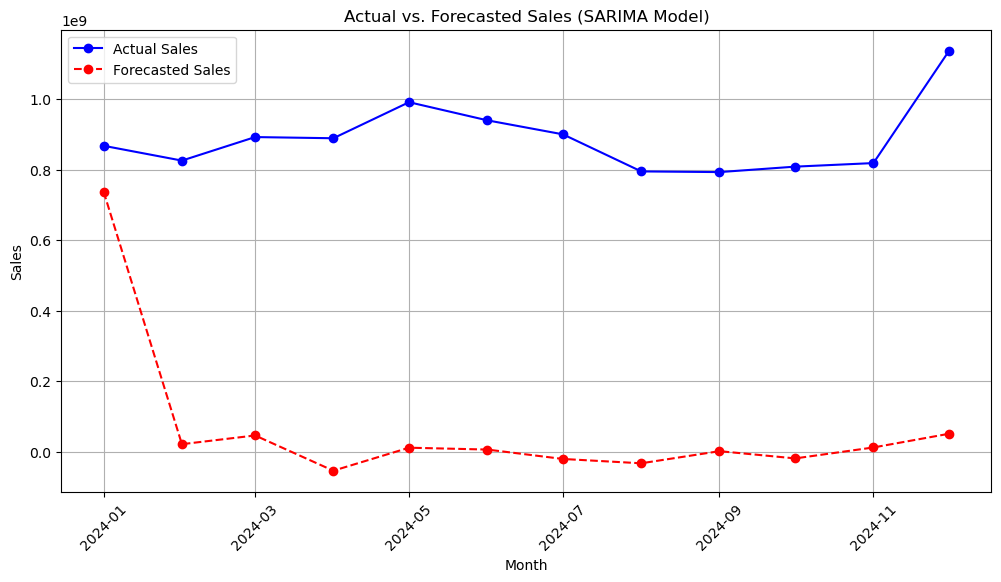

In [188]:
import matplotlib.pyplot as plt

# Reset index if 'Month' is the index
df_results_sarima = df_results_sarima.reset_index()

# Convert 'Month' to datetime format if not already
df_results_sarima["Month"] = pd.to_datetime(df_results_sarima["Month"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_results_sarima["Month"], df_results_sarima["Sales"], marker='o', linestyle='-', label="Actual Sales", color="blue")
plt.plot(df_results_sarima["Month"], df_results_sarima["Forecasted Sales"], marker='o', linestyle='--', label="Forecasted Sales", color="red")

# Formatting
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Actual vs. Forecasted Sales (SARIMA Model)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show Plot
plt.show()


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [191]:
# Filter only 2022 & 2023 data
df_train = df_final[df_final["Month"].dt.year.isin([2022, 2023])]

# Aggregate sales by month
df_train = df_train.groupby(df_train["Month"].dt.to_period("M")).agg({"Sales": "sum"}).reset_index()

# Convert period (YYYY-MM) back to timestamp (YYYY-MM-DD)
df_train["Month"] = df_train["Month"].dt.to_timestamp()

# Rename columns for consistency with forecasting models
df_train = df_train.rename(columns={"Sales": "y", "Month": "ds"})

# Verify results
print(df_train.head())



          ds            y
0 2022-01-01  689286227.0
1 2022-02-01  659027696.0
2 2022-03-01  685317791.0
3 2022-04-01  841690397.0
4 2022-05-01  875393131.0


In [193]:
# Initialize the model (Additive trend & seasonality)
ets_model = ExponentialSmoothing(df_train["y"], 
                                 trend="add", 
                                 seasonal="add", 
                                 seasonal_periods=12)

# Fit the model
ets_fitted = ets_model.fit()


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [194]:
# Create future months for 2024
future_dates = pd.date_range(start="2024-01-01", periods=12, freq="M")

# Forecast sales
forecast_ets = ets_fitted.forecast(steps=12)

# Convert to DataFrame
df_forecast_ets = pd.DataFrame({"Month": future_dates, "Forecasted Sales": forecast_ets})
print(df_forecast_ets.head())


        Month  Forecasted Sales
24 2024-01-31      7.362362e+08
25 2024-02-29      7.181870e+08
26 2024-03-31      7.686028e+08
27 2024-04-30      8.386981e+08
28 2024-05-31      9.328207e+08


In [197]:
# Check if df_results_ets exists
print("Checking if df_results_ets is defined...")
try:
    print(df_results_ets.head())
except NameError:
    print("❌ ERROR: df_results_ets is NOT defined. Check Step 4 (ETS model).")


Checking if df_results_ets is defined...
❌ ERROR: df_results_ets is NOT defined. Check Step 4 (ETS model).


In [199]:
# Rename columns in df_train to match expected names
df_train = df_train.rename(columns={"y": "Sales"})
print(df_train.head())  # Verify column names


          ds        Sales
0 2022-01-01  689286227.0
1 2022-02-01  659027696.0
2 2022-03-01  685317791.0
3 2022-04-01  841690397.0
4 2022-05-01  875393131.0


In [201]:
# Ensure training dataset exists
if "df_train" not in locals():
    print("❌ ERROR: df_train is not defined. Check earlier steps.")

# Fit ETS Model (Ensure df_train contains correct data)
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

ets_model = ETSModel(df_train["Sales"], seasonal="mul", seasonal_periods=12)
ets_fit = ets_model.fit()

# Forecast for 12 months (2024)
forecast_ets = ets_fit.forecast(steps=12)

# Create dataframe for results
df_results_ets = pd.DataFrame({
    "ds": pd.date_range(start="2024-01-01", periods=12, freq="M"),
    "Forecasted Sales": forecast_ets
})

# Display forecast
print(df_results_ets.head())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99568D+01    |proj g|=  1.46858D+00

At iterate    1    f=  1.91999D+01    |proj g|=  7.26209D-01

At iterate    2    f=  1.91151D+01    |proj g|=  1.53315D+00

At iterate    3    f=  1.88384D+01    |proj g|=  1.74908D+00

At iterate    4    f=  1.88255D+01    |proj g|=  2.78404D+00

At iterate    5    f=  1.85175D+01    |proj g|=  1.63023D+00

At iterate    6    f=  1.84879D+01    |proj g|=  2.81230D-01

At iterate    7    f=  1.84842D+01    |proj g|=  1.07595D-01

At iterate    8    f=  1.84838D+01    |proj g|=  1.10969D-01

At iterate    9    f=  1.84834D+01    |proj g|=  1.04928D-01

At iterate   10    f=  1.84828D+01    |proj g|=  1.00709D-01

At iterate   11    f=  1.84810D+01    |proj g|=  1.53891D-01

At iterate   12    f=  1.84741D+01    |proj g|=  4.20238D-01

At iterate   13    f=  1.8

In [218]:
df_results_ets

,Month,Forecasted Sales
0,2024-01-01,7.362362e+08
1,2024-02-01,7.181870e+08
2,2024-03-01,7.686028e+08
3,2024-04-01,8.386981e+08
4,2024-05-01,9.328207e+08
5,2024-06-01,8.998722e+08
6,2024-07-01,8.680063e+08
7,2024-08-01,8.418829e+08
8,2024-09-01,7.852478e+08
9,2024-10-01,7.396550e+08


In [217]:
# Add 1 day to shift the forecast to the correct month
df_results_ets["Month"] = df_results_ets["Month"] - pd.DateOffset(months=1)


## oops kernel restarted


In [2]:
import pandas as pd
import numpy as np

# Load main_extended.csv
df = pd.read_csv("main_extended.csv", parse_dates=["Month"])

# Ensure data is sorted by date
df = df.sort_values(by="Month")

# Split data into Training (2022-2023) and Testing (2024)
df_train = df[df["Month"].dt.year < 2024][["Month", "Sales"]]
df_test = df[df["Month"].dt.year == 2024][["Month", "Sales"]]

# Rename columns to match Prophet/SARIMA/ETS requirements
df_train = df_train.rename(columns={"Month": "ds", "Sales": "y"})
df_test = df_test.rename(columns={"Month": "ds", "Sales": "Actual Sales"})

# Save train and test sets for safety
df_train.to_csv("df_train.csv", index=False)
df_test.to_csv("df_test.csv", index=False)

print(df_train.head(), df_test.head())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
              ds        y
0     2022-01-01    480.0
13302 2022-01-01    920.0
13301 2022-01-01   3682.0
13300 2022-01-01  24626.0
13299 2022-01-01  17824.0                ds  Actual Sales
487887 2024-01-01       34950.0
487892 2024-01-01        5000.0
487888 2024-01-01         900.0
487886 2024-01-01        1176.0
487889 2024-01-01         360.0


## Prophet Forecasting

In [3]:
from prophet import Prophet

# Load training data
df_train = pd.read_csv("df_train.csv", parse_dates=["ds"])

# Train Prophet Model
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(df_train)

# Create future dataframe for 12 months (Jan-Dec 2024)
future = prophet_model.make_future_dataframe(periods=12, freq="M")
forecast = prophet_model.predict(future)

# Extract Forecasted 2024 values
forecast_2024 = forecast[forecast["ds"].dt.year == 2024][["ds", "yhat"]]
forecast_2024 = forecast_2024.rename(columns={"yhat": "Forecasted Sales"})


print(forecast_2024.head())


18:18:00 - cmdstanpy - INFO - Chain [1] start processing
18:18:14 - cmdstanpy - INFO - Chain [1] done processing


           ds  Forecasted Sales
25 2024-01-31      38933.302254
26 2024-02-29      43567.138242
27 2024-03-31      44202.569698
28 2024-04-30      52965.559944
29 2024-05-31      51860.269170


## ETS Forecasting

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train ETS Model (Triple Exponential Smoothing)
ets_model = ExponentialSmoothing(df_train["y"], trend="add", seasonal="add", seasonal_periods=12)
ets_fitted = ets_model.fit()

# Forecast
forecast_2024_ets = ets_fitted.forecast(12)

# Create DataFrame
df_results_ets = pd.DataFrame({
    "ds": pd.date_range(start="2024-01-01", periods=12, freq="M"),
    "Forecasted Sales": forecast_2024_ets
})



print(df_results_ets.head())

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


               ds  Forecasted Sales
479868 2024-01-31      81869.723016
479869 2024-02-29      78813.948121
479870 2024-03-31      81327.360115
479871 2024-04-30      79645.145749
479872 2024-05-31      78866.600918


In [6]:


# Shift forecast dates forward to match actual sales
forecast_2024["ds"] = forecast_2024["ds"] + pd.DateOffset(days=1)
df_results_ets["ds"] = df_results_ets["ds"] + pd.DateOffset(days=1)





In [7]:
forecast_2024

,ds,Forecasted Sales
25,2024-02-01,38933.302254
26,2024-03-01,43567.138242
27,2024-04-01,44202.569698
28,2024-05-01,52965.559944
29,2024-06-01,51860.269170
30,2024-07-01,48792.518513
31,2024-08-01,47023.381942
32,2024-09-01,46505.695161
33,2024-10-01,41605.391077
34,2024-11-01,42959.839101


In [8]:
df_results_ets

,ds,Forecasted Sales
479868,2024-02-01,81869.723016
479869,2024-03-01,78813.948121
479870,2024-04-01,81327.360115
479871,2024-05-01,79645.145749
479872,2024-06-01,78866.600918
479873,2024-07-01,81707.089666
479874,2024-08-01,81552.210923
479875,2024-09-01,81262.274324
479876,2024-10-01,82938.624795
479877,2024-11-01,82176.721126


In [9]:
df_test

,ds,Actual Sales
487887,2024-01-01,34950.0
487892,2024-01-01,5000.0
487888,2024-01-01,900.0
487886,2024-01-01,1176.0
487889,2024-01-01,360.0
...,...,...
619442,2024-12-01,6336.0
619443,2024-12-01,555.0
619444,2024-12-01,7575.0
619433,2024-12-01,2948.0


In [10]:
df_forecast_prophet = forecast_2024.copy()

In [11]:
df_forecast_ets = df_results_ets.copy()

In [12]:
# Rename columns for clarity
df_forecast_prophet.rename(columns={"ds": "Month", "Forecasted Sales": "Forecasted Sales (Prophet)"}, inplace=True)
df_forecast_ets.rename(columns={"ds": "Month", "Forecasted Sales": "Forecasted Sales (ETS)"}, inplace=True)

In [13]:
df_forecast_prophet

,Month,Forecasted Sales (Prophet)
25,2024-02-01,38933.302254
26,2024-03-01,43567.138242
27,2024-04-01,44202.569698
28,2024-05-01,52965.559944
29,2024-06-01,51860.269170
30,2024-07-01,48792.518513
31,2024-08-01,47023.381942
32,2024-09-01,46505.695161
33,2024-10-01,41605.391077
34,2024-11-01,42959.839101


In [14]:
df_forecast_ets

,Month,Forecasted Sales (ETS)
479868,2024-02-01,81869.723016
479869,2024-03-01,78813.948121
479870,2024-04-01,81327.360115
479871,2024-05-01,79645.145749
479872,2024-06-01,78866.600918
479873,2024-07-01,81707.089666
479874,2024-08-01,81552.210923
479875,2024-09-01,81262.274324
479876,2024-10-01,82938.624795
479877,2024-11-01,82176.721126


In [17]:
df_test.rename(columns={"ds": "Month"}, inplace=True)

In [18]:
df_actual_2024 = df_test.copy()

In [19]:
df_actual_2024

,Month,Actual Sales
487887,2024-01-01,34950.0
487892,2024-01-01,5000.0
487888,2024-01-01,900.0
487886,2024-01-01,1176.0
487889,2024-01-01,360.0
...,...,...
619442,2024-12-01,6336.0
619443,2024-12-01,555.0
619444,2024-12-01,7575.0
619433,2024-12-01,2948.0


In [23]:
df_actual_2024_grouped = df_actual_2024.groupby("Month", as_index=False)["Actual Sales"].sum()

# Verify
df_actual_2024_grouped

,Month,Actual Sales
0,2024-01-01,8.681336e+08
1,2024-02-01,8.261234e+08
2,2024-03-01,8.928898e+08
3,2024-04-01,8.895417e+08
4,2024-05-01,9.918482e+08
5,2024-06-01,9.404240e+08
6,2024-07-01,9.006140e+08
7,2024-08-01,7.954411e+08
8,2024-09-01,7.935028e+08
9,2024-10-01,8.089719e+08


In [24]:
# Merge Prophet forecast with aggregated actual sales
df_comparison_prophet = df_actual_2024_grouped.merge(df_forecast_prophet, on="Month", how="left")

# Save to CSV
df_comparison_prophet.to_csv("df_comparison_prophet.csv", index=False)

# Verify
print(df_comparison_prophet.head())



       Month  Actual Sales  Forecasted Sales (Prophet)
0 2024-01-01   868133604.0                         NaN
1 2024-02-01   826123416.0                38933.302254
2 2024-03-01   892889793.0                43567.138242
3 2024-04-01   889541690.0                44202.569698
4 2024-05-01   991848193.0                52965.559944


In [26]:
import pandas as pd
import numpy as np
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Load main dataset (ensuring it's properly formatted)
df_main = pd.read_csv("main_extended.csv", parse_dates=["Month"])

# Load actual 2024 sales
df_actual_2024 = df_main[df_main["Month"].dt.year == 2024].groupby("Month", as_index=False)["Sales"].sum()

# Rename for clarity
df_actual_2024 = df_actual_2024.rename(columns={"Sales": "Actual Sales"})

# Verify
df_actual_2024


,Month,Actual Sales
0,2024-01-01,8.681336e+08
1,2024-02-01,8.261234e+08
2,2024-03-01,8.928898e+08
3,2024-04-01,8.895417e+08
4,2024-05-01,9.918482e+08
5,2024-06-01,9.404240e+08
6,2024-07-01,9.006140e+08
7,2024-08-01,7.954411e+08
8,2024-09-01,7.935028e+08
9,2024-10-01,8.089719e+08


In [27]:
# Filter only 2022-2023 data for training
df_train = df_main[df_main["Month"].dt.year < 2024].groupby("Month", as_index=False)["Sales"].sum()

# Rename for compatibility
df_train = df_train.rename(columns={"Month": "ds", "Sales": "y"})

# Verify
print(df_train.head())


          ds            y
0 2022-01-01  689286227.0
1 2022-02-01  659027696.0
2 2022-03-01  685317791.0
3 2022-04-01  841690397.0
4 2022-05-01  875393131.0


In [28]:
# Initialize Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(df_train)

# Create future dataframe
future_dates = prophet_model.make_future_dataframe(periods=12, freq='M')  # 12 months for 2024

# Generate forecast
forecast_prophet = prophet_model.predict(future_dates)

# Select relevant columns
df_forecast_prophet = forecast_prophet[["ds", "yhat"]].rename(columns={"ds": "Month", "yhat": "Forecasted Sales (Prophet)"})

# Verify
print(df_forecast_prophet.tail(12))


20:34:05 - cmdstanpy - INFO - Chain [1] start processing
20:34:20 - cmdstanpy - INFO - Chain [1] done processing


        Month  Forecasted Sales (Prophet)
24 2023-12-31                6.234335e+08
25 2024-01-31                7.493870e+08
26 2024-02-29                8.478839e+08
27 2024-03-31                8.347389e+08
28 2024-04-30                1.010689e+09
29 2024-05-31                9.835857e+08
30 2024-06-30                9.127538e+08
31 2024-07-31                8.599806e+08
32 2024-08-31                8.623107e+08
33 2024-09-30                7.704930e+08
34 2024-10-31                7.864695e+08
35 2024-11-30                1.102076e+09


In [29]:
df_forecast_prophet

,Month,Forecasted Sales (Prophet)
0,2022-01-01,6.892857e+08
1,2022-02-01,6.590273e+08
2,2022-03-01,6.853180e+08
3,2022-04-01,8.416905e+08
4,2022-05-01,8.753929e+08
5,2022-06-01,8.503818e+08
6,2022-07-01,8.276063e+08
7,2022-08-01,8.034102e+08
8,2022-09-01,7.469449e+08
9,2022-10-01,7.028058e+08


In [30]:
# Initialize ETS model
ets_model = ExponentialSmoothing(df_train["y"], seasonal="add", seasonal_periods=12)
ets_fitted = ets_model.fit()

# Forecast 12 months (2024)
forecast_ets = ets_fitted.forecast(12)

# Convert to DataFrame
df_forecast_ets = pd.DataFrame({
    "Month": pd.date_range(start="2024-01-01", periods=12, freq="M"),
    "Forecasted Sales (ETS)": forecast_ets.values
})

# Verify
print(df_forecast_ets)


        Month  Forecasted Sales (ETS)
0  2024-01-31            7.442629e+08
1  2024-02-29            7.255959e+08
2  2024-03-31            7.761101e+08
3  2024-04-30            8.386888e+08
4  2024-05-31            9.354959e+08
5  2024-06-30            9.001852e+08
6  2024-07-31            8.674555e+08
7  2024-08-31            8.404211e+08
8  2024-09-30            7.796118e+08
9  2024-10-31            7.339535e+08
10 2024-11-30            7.016205e+08
11 2024-12-31            9.374870e+08


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
df_forecast_ets

,Month,Forecasted Sales (ETS)
0,2024-01-31,7.442629e+08
1,2024-02-29,7.255959e+08
2,2024-03-31,7.761101e+08
3,2024-04-30,8.386888e+08
4,2024-05-31,9.354959e+08
5,2024-06-30,9.001852e+08
6,2024-07-31,8.674555e+08
7,2024-08-31,8.404211e+08
8,2024-09-30,7.796118e+08
9,2024-10-31,7.339535e+08


In [35]:
df_forecast_prophet = df_forecast_prophet.tail(12)


In [37]:
df_forecast_prophet["Month"] = df_forecast_prophet["Month"] + pd.Timedelta(days=1)

df_forecast_prophet


/var/folders/yb/hsk33p551y1cfnnwh8n2gt7r0000gn/T/ipykernel_49073/1046690883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast_prophet["Month"] = df_forecast_prophet["Month"] + pd.Timedelta(days=1)


,Month,Forecasted Sales (Prophet)
24,2024-01-01,6.234335e+08
25,2024-02-01,7.493870e+08
26,2024-03-01,8.478839e+08
27,2024-04-01,8.347389e+08
28,2024-05-01,1.010689e+09
29,2024-06-01,9.835857e+08
30,2024-07-01,9.127538e+08
31,2024-08-01,8.599806e+08
32,2024-09-01,8.623107e+08
33,2024-10-01,7.704930e+08


In [38]:
df_actual_2024

,Month,Actual Sales
0,2024-01-01,8.681336e+08
1,2024-02-01,8.261234e+08
2,2024-03-01,8.928898e+08
3,2024-04-01,8.895417e+08
4,2024-05-01,9.918482e+08
5,2024-06-01,9.404240e+08
6,2024-07-01,9.006140e+08
7,2024-08-01,7.954411e+08
8,2024-09-01,7.935028e+08
9,2024-10-01,8.089719e+08


In [39]:
df_results_prophet = df_forecast_prophet.merge(df_actual_2024, on="Month", how="left")

df_results_prophet


,Month,Forecasted Sales (Prophet),Actual Sales
0,2024-01-01,6.234335e+08,8.681336e+08
1,2024-02-01,7.493870e+08,8.261234e+08
2,2024-03-01,8.478839e+08,8.928898e+08
3,2024-04-01,8.347389e+08,8.895417e+08
4,2024-05-01,1.010689e+09,9.918482e+08
5,2024-06-01,9.835857e+08,9.404240e+08
6,2024-07-01,9.127538e+08,9.006140e+08
7,2024-08-01,8.599806e+08,7.954411e+08
8,2024-09-01,8.623107e+08,7.935028e+08
9,2024-10-01,7.704930e+08,8.089719e+08


In [43]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Drop any rows where actual sales are NaN
df_results_prophet = df_results_prophet.dropna()

# Compute MAPE
mape_prophet = mean_absolute_percentage_error(df_results_prophet["Actual Sales"], df_results_prophet["Forecasted Sales (Prophet)"]) * 100

# Compute RMSE
rmse_prophet = np.sqrt(mean_squared_error(df_results_prophet["Actual Sales"], df_results_prophet["Forecasted Sales (Prophet)"]))

# Compute SMAPE
def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_prophet = smape(df_results_prophet["Actual Sales"], df_results_prophet["Forecasted Sales (Prophet)"])

# Print results
print(f"📊 Forecast Accuracy for Prophet:")
print(f"✅ MAPE: {mape_prophet:.2f}%")
print(f"✅ RMSE: {rmse_prophet:.2f}")
print(f"✅ SMAPE: {smape_prophet:.2f}%")


📊 Forecast Accuracy for Prophet:
✅ MAPE: 7.10%
✅ RMSE: 84602060.54
✅ SMAPE: 7.50%


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [45]:
df_forecast_ets["Month"] = df_forecast_ets["Month"].apply(lambda x: x.replace(day=1))

df_forecast_ets

,Month,Forecasted Sales (ETS)
0,2024-01-01,7.442629e+08
1,2024-02-01,7.255959e+08
2,2024-03-01,7.761101e+08
3,2024-04-01,8.386888e+08
4,2024-05-01,9.354959e+08
5,2024-06-01,9.001852e+08
6,2024-07-01,8.674555e+08
7,2024-08-01,8.404211e+08
8,2024-09-01,7.796118e+08
9,2024-10-01,7.339535e+08


In [46]:
df_results_ets = df_forecast_ets.merge(df_actual_2024, on="Month", how="left")

df_results_ets


,Month,Forecasted Sales (ETS),Actual Sales
0,2024-01-01,7.442629e+08,8.681336e+08
1,2024-02-01,7.255959e+08,8.261234e+08
2,2024-03-01,7.761101e+08,8.928898e+08
3,2024-04-01,8.386888e+08,8.895417e+08
4,2024-05-01,9.354959e+08,9.918482e+08
5,2024-06-01,9.001852e+08,9.404240e+08
6,2024-07-01,8.674555e+08,9.006140e+08
7,2024-08-01,8.404211e+08,7.954411e+08
8,2024-09-01,7.796118e+08,7.935028e+08
9,2024-10-01,7.339535e+08,8.089719e+08


In [47]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Drop NaN values (if any) to avoid errors
df_results_ets = df_results_ets.dropna()

# Compute Metrics
mape_ets = mean_absolute_percentage_error(df_results_ets["Actual Sales"], df_results_ets["Forecasted Sales (ETS)"])
rmse_ets = mean_squared_error(df_results_ets["Actual Sales"], df_results_ets["Forecasted Sales (ETS)"], squared=False)
smape_ets = 100 * (2 * abs(df_results_ets["Actual Sales"] - df_results_ets["Forecasted Sales (ETS)"]) /
                   (abs(df_results_ets["Actual Sales"]) + abs(df_results_ets["Forecasted Sales (ETS)"]))).mean()

# Print Forecast Accuracy
print(f"📊 ETS Forecast Accuracy:")
print(f"✅ MAPE: {mape_ets:.2%}")
print(f"✅ RMSE: {rmse_ets:.2f}")
print(f"✅ SMAPE: {smape_ets:.2f}%")


📊 ETS Forecast Accuracy:
✅ MAPE: 8.96%
✅ RMSE: 95474138.80
✅ SMAPE: 9.49%


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


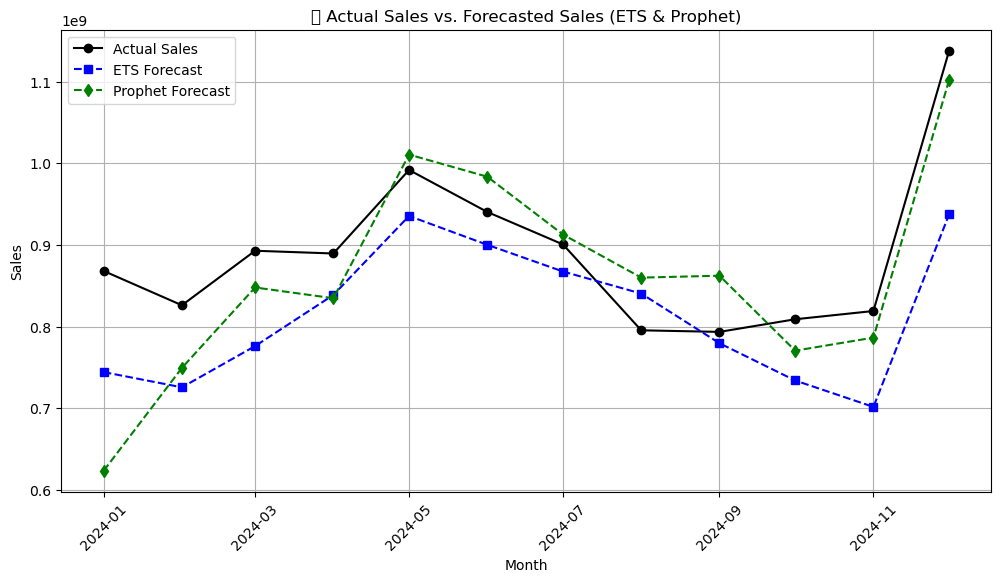

In [49]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Plot Actual Sales
plt.plot(df_results_ets["Month"], df_results_ets["Actual Sales"], label="Actual Sales", marker="o", linestyle="-", color="black")

# Plot ETS Forecast
plt.plot(df_results_ets["Month"], df_results_ets["Forecasted Sales (ETS)"], label="ETS Forecast", marker="s", linestyle="--", color="blue")

# Plot Prophet Forecast
plt.plot(df_results_prophet["Month"], df_results_prophet["Forecasted Sales (Prophet)"], label="Prophet Forecast", marker="d", linestyle="--", color="green")

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("📈 Actual Sales vs. Forecasted Sales (ETS & Prophet)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [64]:
pip install prophet


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
from prophet import Prophet

# Load the dataset
df = pd.read_csv("main_extended.csv")  # Ensure you're using the full dataset with 2022-2024 data

# Convert Month to datetime format
df["Month"] = pd.to_datetime(df["Month"])

# Aggregate by month (Sum sales per month)
df_monthly = df.groupby("Month")["Sales"].sum().reset_index()

# Rename columns to fit Prophet's expected format
df_monthly.rename(columns={"Month": "ds", "Sales": "y"}, inplace=True)

df_monthly



,ds,y
0,2022-01-01,6.892862e+08
1,2022-02-01,6.590277e+08
2,2022-03-01,6.853178e+08
3,2022-04-01,8.416904e+08
4,2022-05-01,8.753931e+08
5,2022-06-01,8.503824e+08
6,2022-07-01,8.276055e+08
7,2022-08-01,8.034108e+08
8,2022-09-01,7.469447e+08
9,2022-10-01,7.028054e+08


In [72]:
# Initialize Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Fit the model
model.fit(df_monthly)


21:29:41 - cmdstanpy - INFO - Chain [1] start processing
21:29:42 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
# Create future dataframe for 12 months into 2025
future = model.make_future_dataframe(periods=12, freq="M")

# Predict
forecast = model.predict(future)

# Extract relevant forecasted data
df_forecast_prophet = forecast[["ds", "yhat"]].rename(columns={"ds": "Month", "yhat": "Forecasted Sales (Prophet)"})

# Display sample results
print(df_forecast_prophet.tail(15))  # Show 2025 predictions


        Month  Forecasted Sales (Prophet)
33 2024-10-01                8.138182e+08
34 2024-11-01                8.197720e+08
35 2024-12-01                1.129074e+09
36 2024-12-31                9.540940e+08
37 2025-01-31                9.044909e+08
38 2025-02-28                7.490216e+08
39 2025-03-31                9.356459e+08
40 2025-04-30                1.000717e+09
41 2025-05-31                9.987011e+08
42 2025-06-30                9.618258e+08
43 2025-07-31                9.909625e+08
44 2025-08-31                9.239024e+08
45 2025-09-30                7.998468e+08
46 2025-10-31                7.700638e+08
47 2025-11-30                1.003119e+09


In [76]:
df_forecast_prophet.tail(12)


,Month,Forecasted Sales (Prophet)
36,2024-12-31,9.540940e+08
37,2025-01-31,9.044909e+08
38,2025-02-28,7.490216e+08
39,2025-03-31,9.356459e+08
40,2025-04-30,1.000717e+09
41,2025-05-31,9.987011e+08
42,2025-06-30,9.618258e+08
43,2025-07-31,9.909625e+08
44,2025-08-31,9.239024e+08
45,2025-09-30,7.998468e+08


In [77]:
df_forecast_prophet_2025 = df_forecast_prophet.tail(12).copy()

In [78]:
df_forecast_prophet_2025["Month"] = df_forecast_prophet_2025["Month"] + pd.Timedelta(days=1)

df_forecast_prophet_2025

,Month,Forecasted Sales (Prophet)
36,2025-01-01,9.540940e+08
37,2025-02-01,9.044909e+08
38,2025-03-01,7.490216e+08
39,2025-04-01,9.356459e+08
40,2025-05-01,1.000717e+09
41,2025-06-01,9.987011e+08
42,2025-07-01,9.618258e+08
43,2025-08-01,9.909625e+08
44,2025-09-01,9.239024e+08
45,2025-10-01,7.998468e+08


In [81]:
df_monthly.rename(columns={"ds": "Month", "y": "Actual Sales"}, inplace=True)


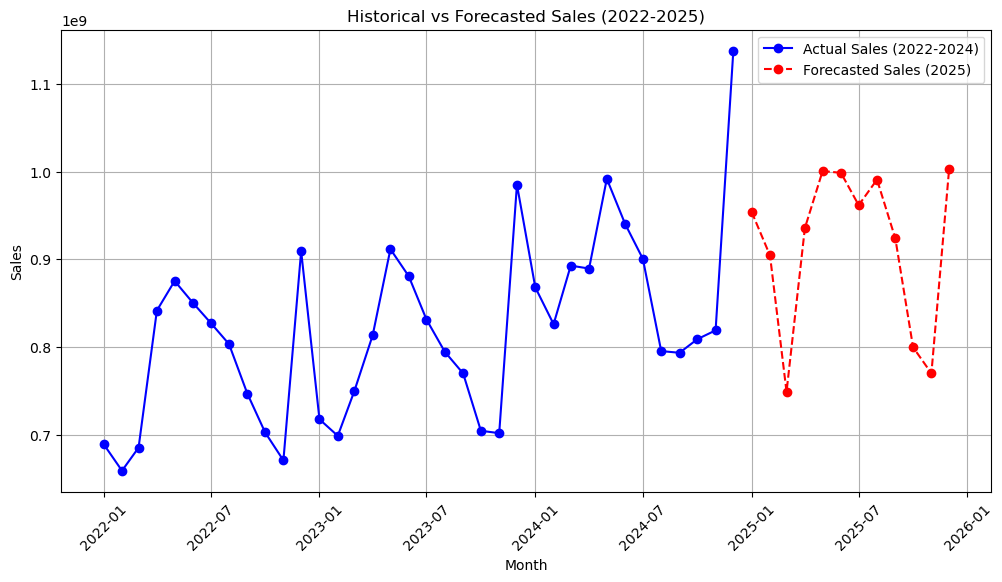

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Month' is in datetime format
df_monthly["Month"] = pd.to_datetime(df_monthly["Month"])
df_forecast_prophet_2025["Month"] = pd.to_datetime(df_forecast_prophet_2025["Month"])

# Plot historical sales (2022-2024) and forecasted sales (2025)
plt.figure(figsize=(12,6))

# Plot historical sales
plt.plot(df_monthly["Month"], df_monthly["Actual Sales"], 
         label="Actual Sales (2022-2024)", color="blue", marker="o")

# Plot forecasted sales (2025)
plt.plot(df_forecast_prophet_2025["Month"], df_forecast_prophet_2025["Forecasted Sales (Prophet)"], 
         label="Forecasted Sales (2025)", color="red", linestyle="dashed", marker="o")

# Formatting
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Historical vs Forecasted Sales (2022-2025)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [84]:
df_forecast_prophet_2025

,Month,Forecasted Sales (Prophet)
36,2025-01-01,9.540940e+08
37,2025-02-01,9.044909e+08
38,2025-03-01,7.490216e+08
39,2025-04-01,9.356459e+08
40,2025-05-01,1.000717e+09
41,2025-06-01,9.987011e+08
42,2025-07-01,9.618258e+08
43,2025-08-01,9.909625e+08
44,2025-09-01,9.239024e+08
45,2025-10-01,7.998468e+08


In [85]:
df_forecast_prophet_2025.to_csv("forecast_2025.csv", index=False)


In [86]:
mean_actual_sales = df_actual_2024["Actual Sales"].mean()

normalized_rmse_prophet = (84602060.54 / mean_actual_sales) * 100
normalized_rmse_ets = (95474138.80 / mean_actual_sales) * 100

print(f"Normalized RMSE (Prophet): {normalized_rmse_prophet:.2f}%")
print(f"Normalized RMSE (ETS): {normalized_rmse_ets:.2f}%")


Normalized RMSE (Prophet): 9.52%
Normalized RMSE (ETS): 10.74%


In [87]:
mean_actual_sales

888708207.1666666